## CI7000: Project Dissertation
### Machine Learning-Based Hybrid Sales Forecasting for Retail Financial Planning

>> Name: Pragati Priya

>> Student ID: K2461276

>> Date: 01/02/2026

Dataset: Superstore Sales Dataset, Kaggle. Available from https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

## Installing Libraries

In [5]:
#!pip3 install --upgrade pip

In [4]:
#pip install pmdarima

In [3]:
#pip install prophet

In [2]:
#pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import statsmodels.tsa.arima.model
import os

## Loading and Cleaning Dataset

In [6]:
data = pd.read_csv(r"/Users/pragatipriya/Documents/Python/train.csv", sep=None, engine="python", on_bad_lines="error")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
retail_data = data.copy()
retail_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [10]:
retail_data["Postal Code"] = retail_data["Postal Code"].fillna(00000.0)
retail_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
# Changing date type
retail_data["Order Date"] = pd.to_datetime(retail_data["Order Date"], format="%d/%m/%Y", errors="coerce")
retail_data["Ship Date"] = pd.to_datetime(retail_data["Ship Date"], format="%d/%m/%Y", errors="coerce")
retail_data = retail_data.sort_values("Order Date").reset_index(drop=True) #sorted it by date
retail_data = retail_data.drop(columns=["index", "level_0"], errors="ignore") #removed unnecessary columns with similar info 

retail_data["Year"] = retail_data["Order Date"].dt.year
retail_data["Quarter"] = retail_data["Order Date"].dt.quarter
retail_data["Month"] = retail_data["Order Date"].dt.month
retail_data["Month_name"] = retail_data["Order Date"].dt.month_name()
retail_data["Day_of_month"] = retail_data["Order Date"].dt.day
retail_data["Day_of_year"] = retail_data["Order Date"].dt.dayofyear
retail_data["Day_of_week"] = retail_data["Order Date"].dt.weekday
retail_data["Weekday_name"] = retail_data["Order Date"].dt.day_name()
iso = retail_data["Order Date"].dt.isocalendar()
retail_data["Week_of_year"] = iso.week.astype(int)
retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Year,Quarter,Month,Month_name,Day_of_month,Day_of_year,Day_of_week,Weekday_name,Week_of_year
0,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,16.448,2015,1,1,January,3,3,5,Saturday,1
1,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3.540,2015,1,1,January,4,4,6,Sunday,1
2,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,272.736,2015,1,1,January,4,4,6,Sunday,1
3,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,11.784,2015,1,1,January,4,4,6,Sunday,1
4,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19.536,2015,1,1,January,5,5,0,Monday,2


In [12]:
#add cyclical features to week and month as it significatly impacts the convergence rate of the algorithm and model perfomrance. 
retail_data["Dow_sin"] = np.sin(2*np.pi*retail_data["Day_of_week"]/7)
retail_data["Dow_cos"] = np.cos(2*np.pi*retail_data["Day_of_week"]/7)
retail_data["Month_sin"] = np.sin(2*np.pi*(retail_data["Month"]-1)/12)
retail_data["Month_coz"] = np.cos(2*np.pi*(retail_data["Month"]-1)/12)
retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Month_name,Day_of_month,Day_of_year,Day_of_week,Weekday_name,Week_of_year,Dow_sin,Dow_cos,Month_sin,Month_coz
0,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,January,3,3,5,Saturday,1,-0.974928,-0.222521,0.0,1.0
1,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,January,4,4,6,Sunday,1,-0.781831,0.623490,0.0,1.0
2,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,January,4,4,6,Sunday,1,-0.781831,0.623490,0.0,1.0
3,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,January,4,4,6,Sunday,1,-0.781831,0.623490,0.0,1.0
4,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,January,5,5,0,Monday,2,0.000000,1.000000,0.0,1.0


In [13]:
retail_data["Sub-Category"].unique()

array(['Paper', 'Binders', 'Storage', 'Labels', 'Art', 'Phones', 'Chairs',
       'Fasteners', 'Furnishings', 'Accessories', 'Envelopes',
       'Bookcases', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

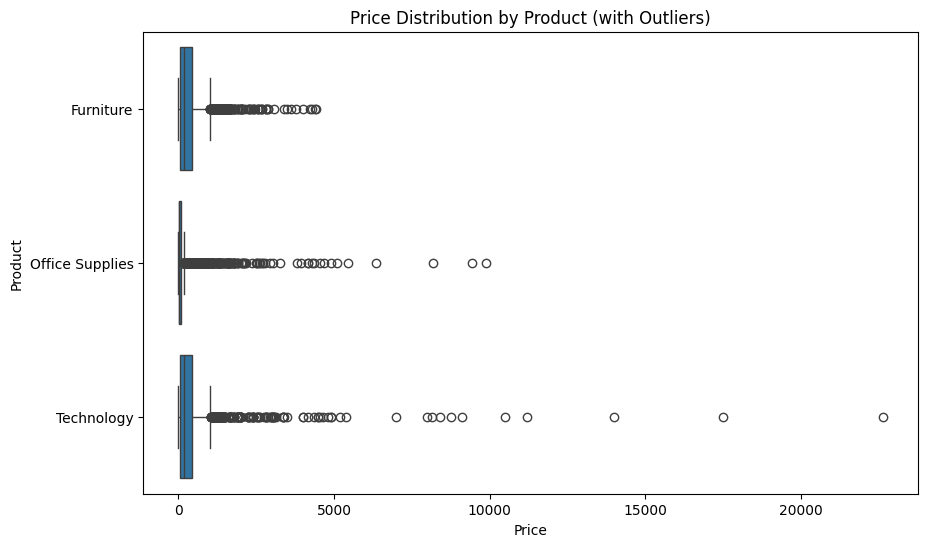

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Sales", y="Category", data=data)
plt.title("Price Distribution by Product (with Outliers)")
plt.xlabel("Price")
plt.ylabel("Product")
plt.show()

In [15]:
retail_data["Country"].unique()

array(['United States'], dtype=object)

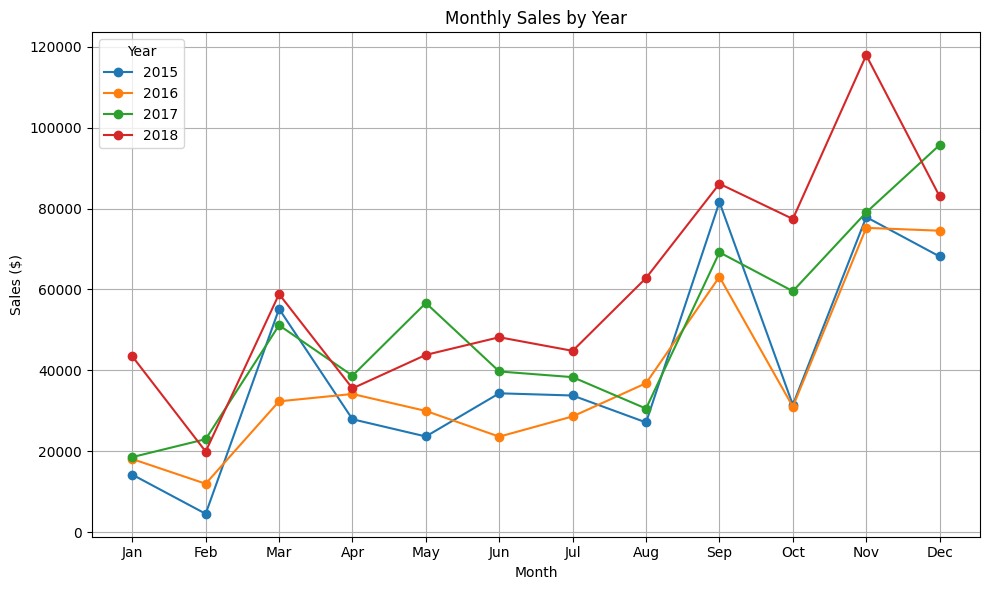

In [16]:
monthly_yearly_avg = retail_data.groupby(["Year", "Month"])["Sales"].sum().reset_index()
pivot_table = monthly_yearly_avg.pivot(index="Month", columns="Year", values="Sales")


plt.figure(figsize=(10,6))
for Year in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[Year], marker="o", label=str(Year))

plt.xticks(range(1,13), 
           [pd.to_datetime(str(m), format="%m").strftime("%b") for m in range(1,13)])

plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

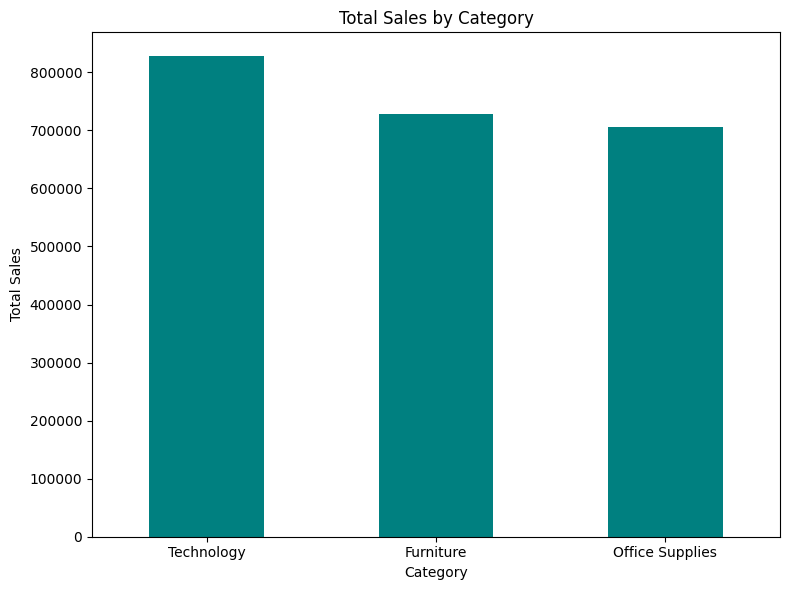

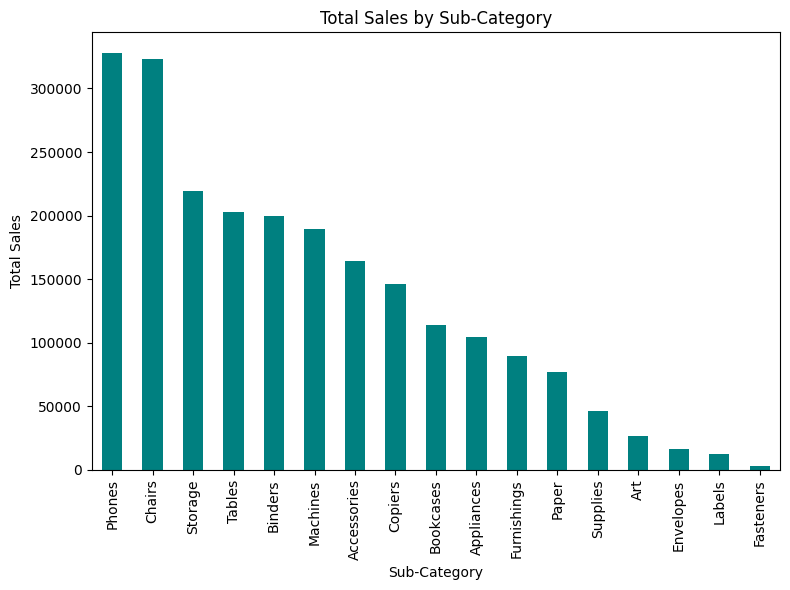

In [17]:
category_sales = retail_data.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
category_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Category", fontsize=12)
plt.xlabel("Category", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

sub_category_sales = retail_data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sub_category_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Sub-Category", fontsize=12)
plt.xlabel("Sub-Category", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

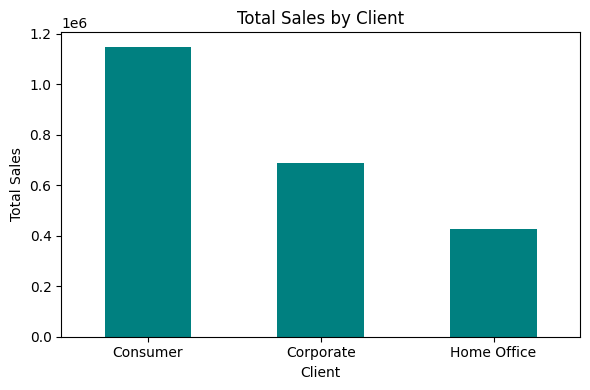

In [18]:
client_sales = retail_data.groupby("Segment")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
client_sales.plot(kind="bar", color="teal")

plt.title("Total Sales by Client", fontsize=12)
plt.xlabel("Client", fontsize=10)
plt.ylabel("Total Sales", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

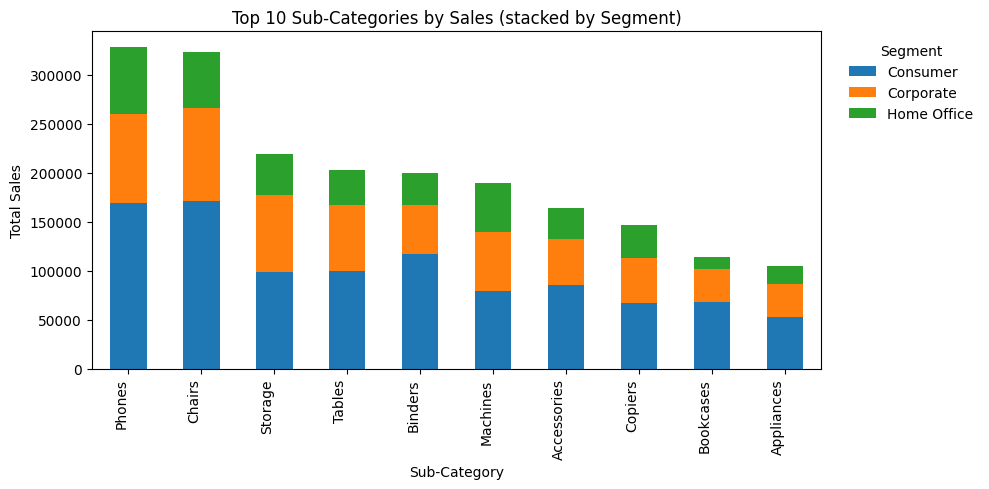

In [19]:
seg_sub = (retail_data
           .groupby(["Segment", "Sub-Category"], as_index=False)["Sales"]
           .sum())
pivot = seg_sub.pivot(index="Sub-Category", columns="Segment", values="Sales").fillna(0)

top10 = pivot.assign(Total=pivot.sum(axis=1)).sort_values("Total", ascending=False).head(10)
top10 = top10.drop(columns="Total")

ax = top10.plot(kind="bar", stacked=True, figsize=(10,5))
ax.set_title("Top 10 Sub-Categories by Sales (stacked by Segment)")
ax.set_xlabel("Sub-Category")
ax.set_ylabel("Total Sales")
ax.legend(title="Segment", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [20]:
## % stacked bar ##
p_stacked = retail_data.groupby(["Segment", "Sub-Category"], as_index=False)["Sales"].sum()
top_subcat = p_stacked.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10)


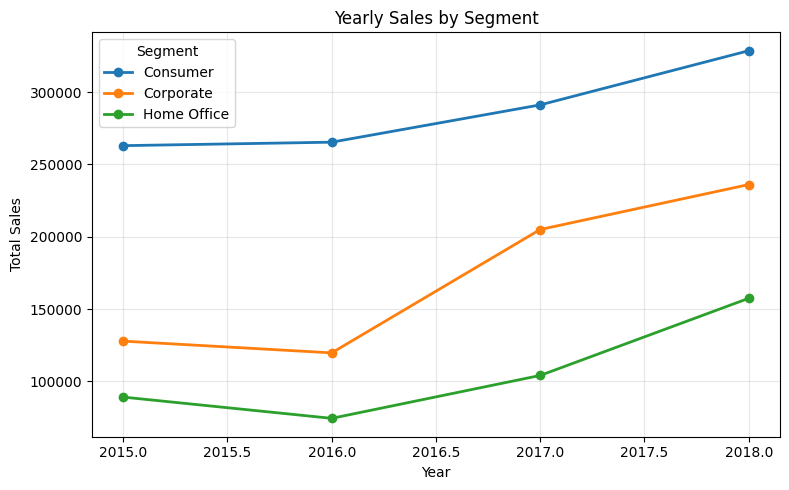

In [21]:
seg_yearly = (retail_data
          .groupby(["Segment", "Year"], as_index=False)["Sales"].sum())
yearly_piv = seg_yearly.pivot(index="Year", columns="Segment", values="Sales")
yearly_piv.plot(marker="o", linewidth=2, figsize=(8,5))


plt.title("Yearly Sales by Segment")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

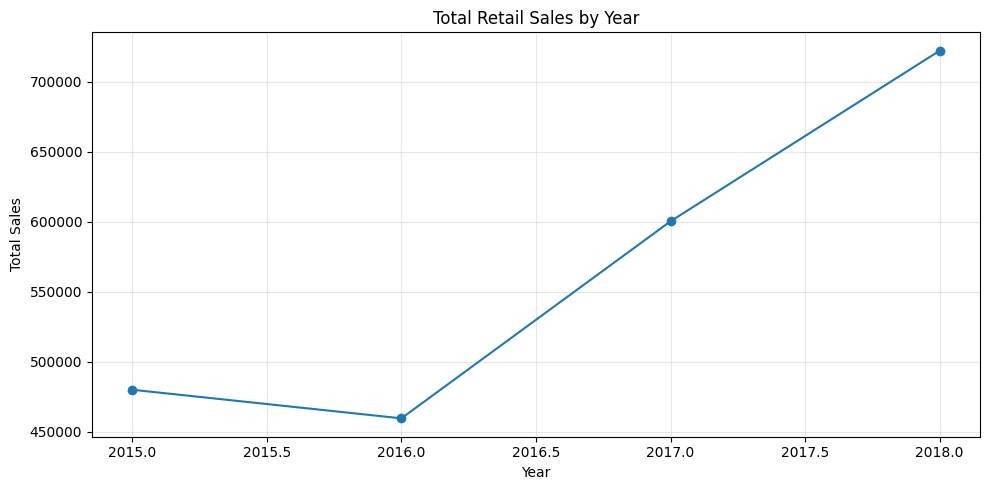

In [22]:
yearly_sales_graph = (
    retail_data
    .assign(Year=retail_data["Order Date"].dt.year)
    .groupby("Year")["Sales"]
    .sum()
)

plt.figure(figsize=(10, 5))
plt.plot(yearly_sales_graph.index, yearly_sales_graph.values, marker="o")

plt.title("Total Retail Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

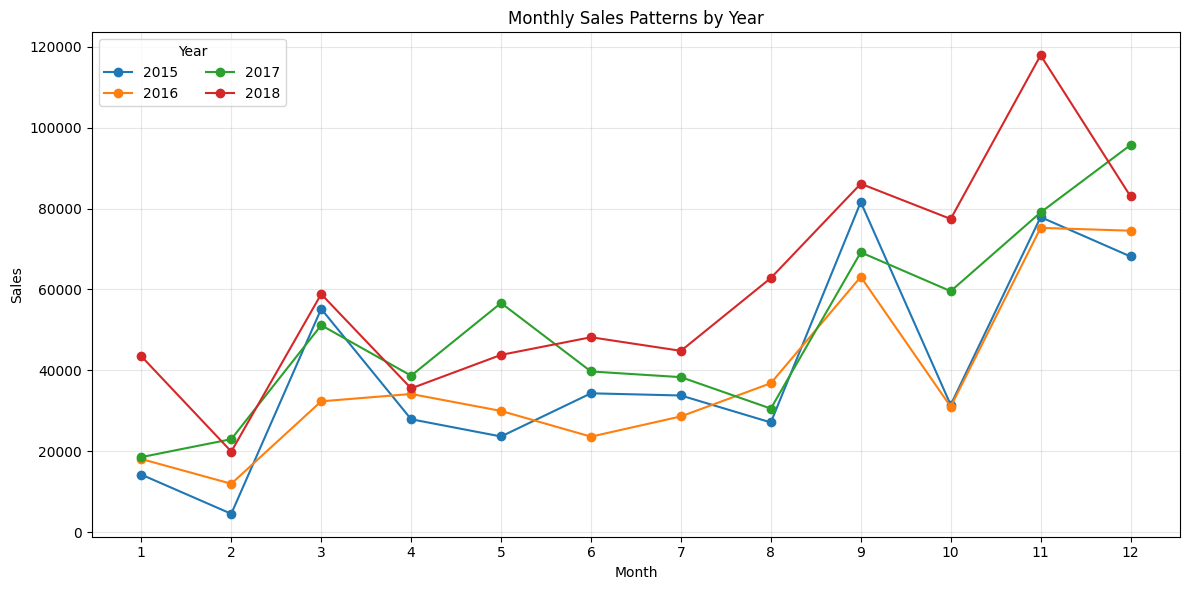

In [23]:
monthly_sales_graph = (
    retail_data
    .assign(Year=retail_data["Order Date"].dt.year,
            Month=retail_data["Order Date"].dt.month)
    .groupby(["Year", "Month"])["Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for year, grp in monthly_sales_graph.groupby("Year"):
    plt.plot(grp["Month"], grp["Sales"], marker="o", label=str(year))

plt.title("Monthly Sales Patterns by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(range(1, 13))
plt.legend(title="Year", ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
seg_monthly = (retail_data
          .groupby(["Segment", "Year", "Month"], as_index=False)["Sales"].sum())
# monthly_piv = seg_monthly.pivot(index="Month", columns="Year", values="Sales")


# plt.figure(figsize=(10,6))
# monthly_piv.plot(marker="o", linewidth=2)

# plt.title("Monthly Sales Trends Across Years", fontsize=14)
# plt.xlabel("Month", fontsize=12)
# plt.ylabel("Total Sales", fontsize=12)
# plt.legend(title="Year", bbox_to_anchor=(1.05,1), loc="upper left")
# plt.grid(True, alpha=0.3)
# plt.xticks(range(1,13))
# plt.tight_layout()
# plt.show()

In [25]:
# pivot_multi = pd.pivot_table(
#     seg_monthly,
#     index="Month",
#     columns=["Year", "Segment"],
#     values="Sales",
#     aggfunc="sum"
# )

# plt.figure(figsize=(12,6))
# pivot_multi.plot(marker="o", linewidth=2)
# plt.title("Monthly Sales by Year and Segment", fontsize=14)
# plt.xlabel("Month", fontsize=12)
# plt.ylabel("Total Sales", fontsize=12)
# plt.grid(True, alpha=0.3)
# plt.xticks(range(1,13))
# plt.legend(title="(Year, Segment)", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()

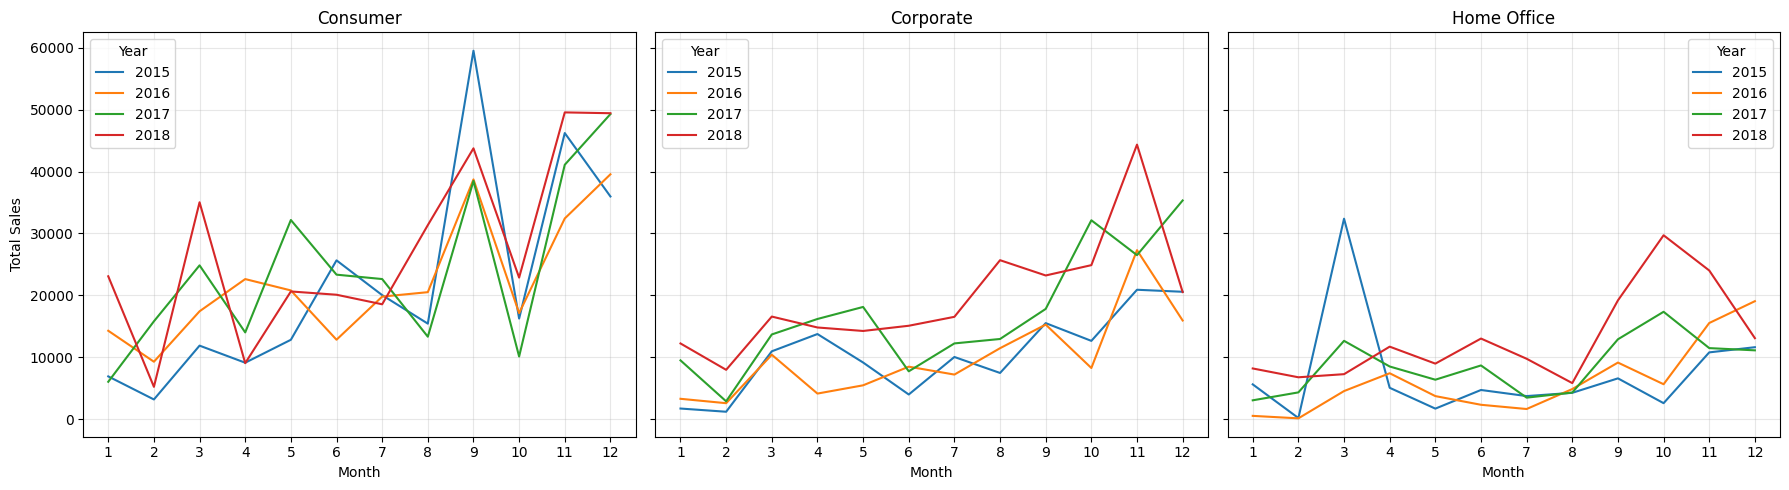

In [26]:
segments_m = seg_monthly["Segment"].unique()
fig, axes = plt.subplots(1, len(segments_m), figsize=(6*len(segments_m), 5), sharey=True)

if len(segments_m) == 1:
    axes = [axes]

for ax, seg in zip(axes, segments_m):
    d = seg_monthly[seg_monthly["Segment"] == seg]
    piv = d.pivot(index="Month", columns="Year", values="Sales")
    piv.plot(ax=ax)
    ax.set_title(f"{seg}")
    ax.set_xlabel("Month"); ax.set_ylabel("Total Sales")
    ax.grid(True, alpha=0.3); ax.set_xticks(range(1,13))

plt.tight_layout(); plt.show()

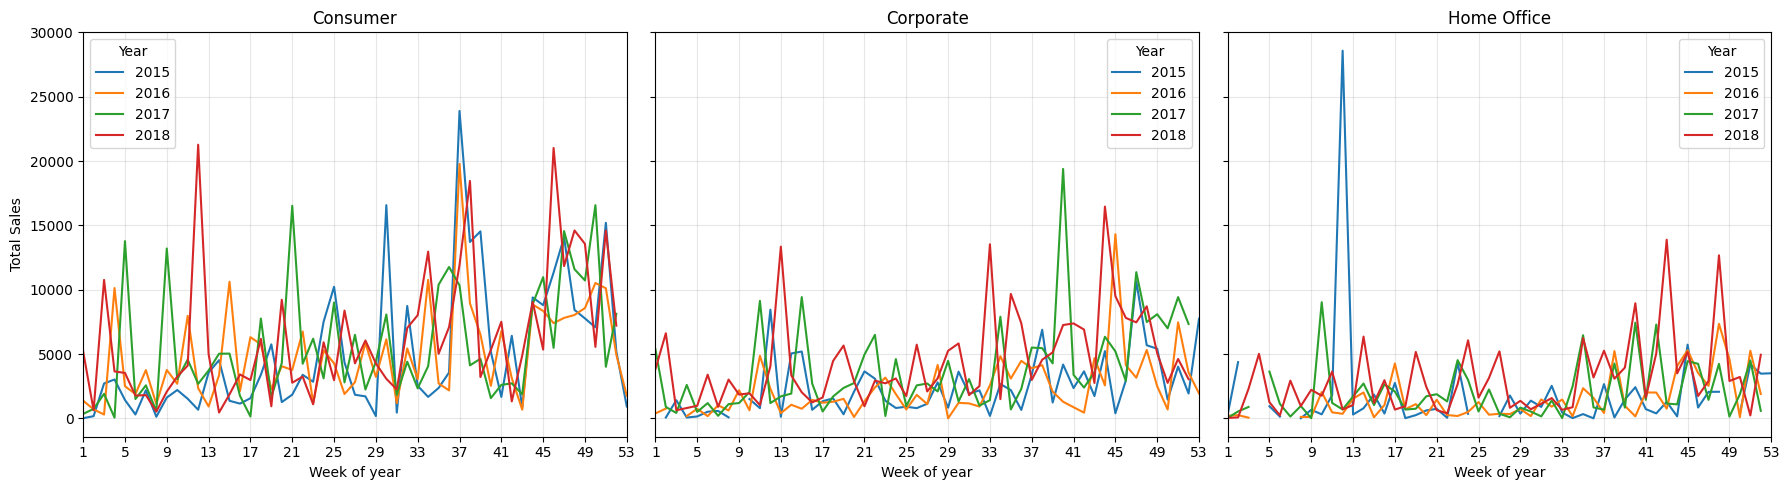

In [27]:
seg_weekly = (retail_data
          .groupby(["Segment", "Year", "Week_of_year"], as_index=False)["Sales"].sum())

segments_w = seg_weekly["Segment"].unique()
fig, axes = plt.subplots(1, len(segments_w), figsize=(6*len(segments_w), 5), sharey=True)

if len(segments_w) == 1:
    axes = [axes]

for ax, seg in zip(axes, segments_w):
    b = seg_weekly[seg_weekly["Segment"] == seg]
    piv = b.pivot(index="Week_of_year", columns="Year", values="Sales")
    piv = piv.reindex(range(1, 54), fill_value=0)
    piv.plot(ax=ax)
    ax.set_title(f"{seg}")
    ax.set_xlabel("Week of year"); ax.set_ylabel("Total Sales")
    ax.set_xlim(1, 53)
    ax.grid(True, alpha=0.3); ax.set_xticks(range(1, 54, 4))

plt.tight_layout(); plt.show()

## Resample by week here

In [28]:
retail_data["Week_of_year"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_68931/846786107.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


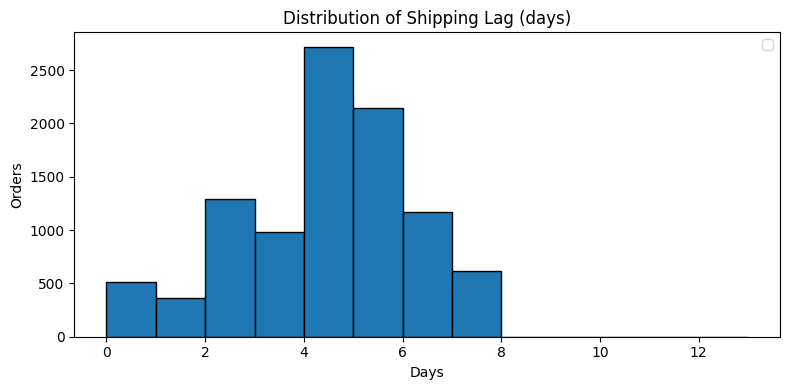

In [29]:

retail_data["ship_lag_days"] = (retail_data["Ship Date"] - retail_data["Order Date"]).dt.days
plt.figure(figsize=(8,4))
plt.hist(retail_data["ship_lag_days"], bins=range(0, 14), edgecolor="black")
plt.title("Distribution of Shipping Lag (days)")
plt.xlabel("Days"); plt.ylabel("Orders")
plt.legend()
plt.tight_layout(); plt.show()


<Figure size 800x400 with 0 Axes>

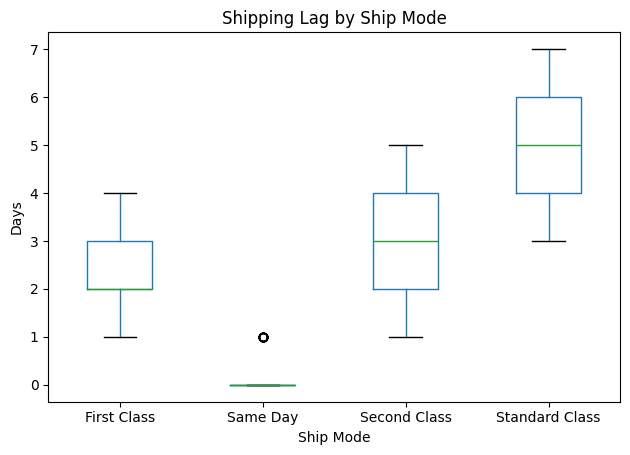

<Figure size 800x400 with 0 Axes>

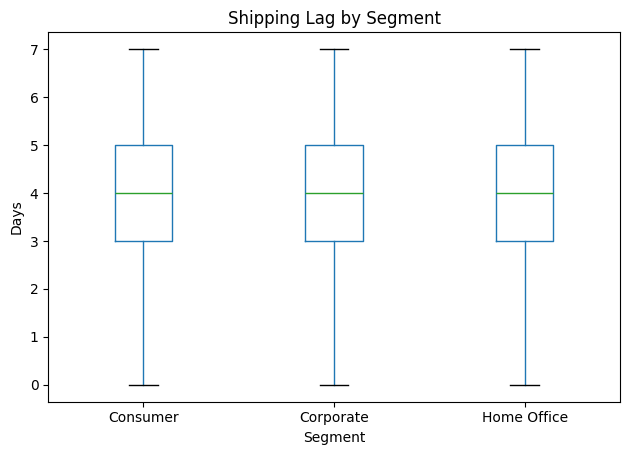

In [30]:
# By Ship Mode
plt.figure(figsize=(8,4))
retail_data.boxplot(column="ship_lag_days", by="Ship Mode", grid=False)
plt.title("Shipping Lag by Ship Mode"); plt.suptitle("")
plt.xlabel("Ship Mode"); plt.ylabel("Days")
plt.tight_layout(); plt.show()

# By Segment
plt.figure(figsize=(8,4))
retail_data.boxplot(column="ship_lag_days", by="Segment", grid=False)
plt.title("Shipping Lag by Segment"); plt.suptitle("")
plt.xlabel("Segment"); plt.ylabel("Days")
plt.tight_layout(); plt.show()

In [31]:
retail_data.drop(columns=[col for col in retail_data.columns if "days_from_last_order" in col], inplace=True)

In [32]:
## returning customers ##

return_cust = retail_data.sort_values(["Customer ID", "Order Date"])
return_cust["days_from_last_order"] = return_cust.groupby("Customer ID")["Order Date"].diff().dt.days
return_cust["orig_index"] = return_cust.index
return_days = return_cust[["orig_index", "days_from_last_order"]]
retail_data = retail_data.merge(return_days, left_index=True, right_on="orig_index", how="left").drop(columns=["orig_index"])


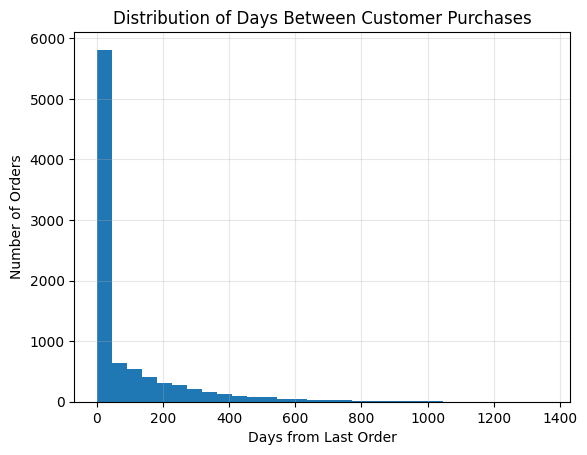

In [33]:
retail_data["days_from_last_order"].dropna().hist(bins=30)
plt.title("Distribution of Days Between Customer Purchases")
plt.xlabel("Days from Last Order")
plt.ylabel("Number of Orders")
plt.grid(True, alpha=0.3)
plt.show()

# plt.figure(figsize=(10,6))
# sns.kdeplot(retail_data["days_from_last_order"].dropna(), bw_adjust=1.5, clip=(0, 365))
# plt.title("Smoothed Distribution of Return Times")
# plt.xlabel("Days Since Last Order")
# plt.ylabel("Density")
# plt.grid(alpha=0.3)
# plt.show()

In [34]:
retail_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Quarter', 'Month', 'Month_name',
       'Day_of_month', 'Day_of_year', 'Day_of_week', 'Weekday_name',
       'Week_of_year', 'Dow_sin', 'Dow_cos', 'Month_sin', 'Month_coz',
       'ship_lag_days', 'days_from_last_order'],
      dtype='object')

In [35]:
## repeat orders per customer ##
repeat_counts = retail_data.groupby("Customer ID")["Order Date"].count()
repeat_counts = repeat_counts[repeat_counts > 1]  
print(repeat_counts)

## ADD THIS AS A COLUMN AND THINK ABOUT HOW THIS CAN BE USED TO MAKE PREDICTIONS.
## maybe I wanna figure out in the last year- which is the highest revnue generating year- how much of it is driven by returning vs new customers.


Customer ID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Name: Order Date, Length: 787, dtype: int64


In [36]:
retail_data["Year"].unique()

array([2015, 2016, 2017, 2018], dtype=int32)

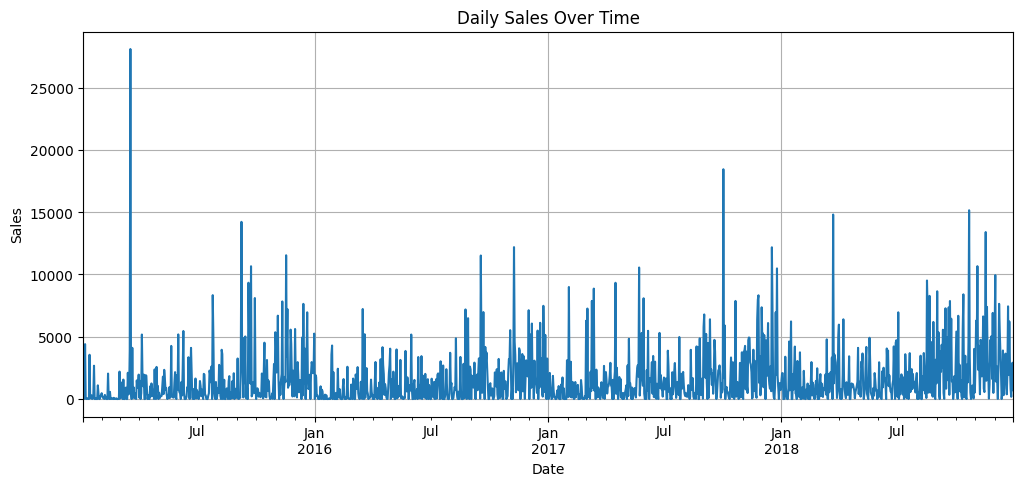

In [96]:
## checking stationarity: meaning mean, variance and covariance are constant over time ##
## this is key for ARIMA/ARMA ##
sales_stat = retail_data.groupby("Order Date")["Sales"].sum().asfreq("D").fillna(0)

plt.figure(figsize=(12, 5))
sales_stat.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()



ADF Statistic: -4.9265833751962465
p-value: 3.094891245873504e-05
Critical Value (1%): -3.434908816804013
Critical Value (5%): -2.863553406963303
Critical Value (10%): -2.5678419239852994


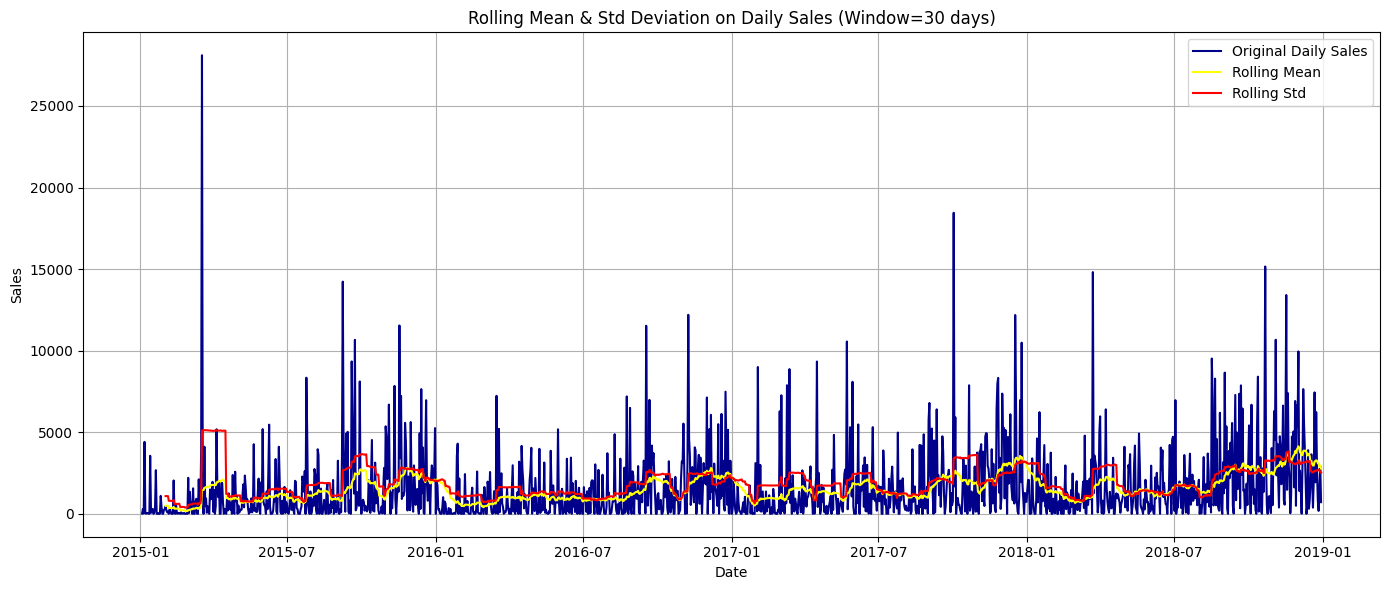

In [100]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_stat.dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


def check_mean_std(ts, window=30):
    rolmean = ts.rolling(window=window).mean()
    rolstd = ts.rolling(window=window).std()

    plt.figure(figsize=(14, 6))
    plt.plot(ts, color='darkblue', label='Original Daily Sales')             # original time series
    plt.plot(rolmean, color='yellow', label='Rolling Mean')  # rolling mean
    plt.plot(rolstd, color='red', label='Rolling Std')    # rolling standard deviation
    plt.title(f'Rolling Mean & Std Deviation on Daily Sales (Window={window} days)')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

check_mean_std(sales_stat.dropna())


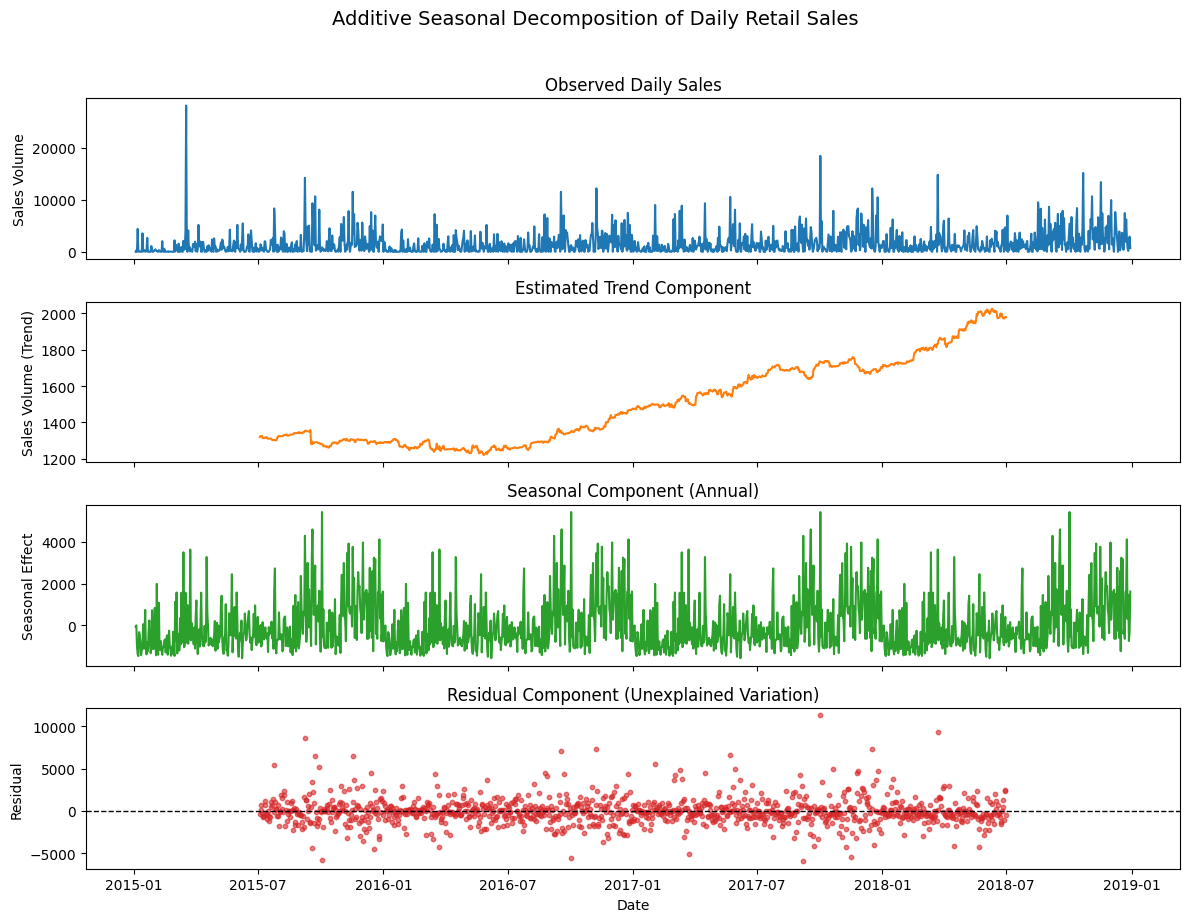

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(sales_stat.dropna(), model='additive', period=365)
# decomp.plot()
fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# Observed
axes[0].plot(decomp.observed, color="tab:blue")
axes[0].set_title("Observed Daily Sales")
axes[0].set_ylabel("Sales Volume")

# Trend
axes[1].plot(decomp.trend, color="tab:orange")
axes[1].set_title("Estimated Trend Component")
axes[1].set_ylabel("Sales Volume (Trend)")

# Seasonal
axes[2].plot(decomp.seasonal, color="tab:green")
axes[2].set_title("Seasonal Component (Annual)")
axes[2].set_ylabel("Seasonal Effect")

# Residual
axes[3].scatter(
    decomp.resid.index,
    decomp.resid,
    s=10,
    alpha=0.6,
    color="tab:red"
)
axes[3].axhline(0, linestyle="--", color="black", linewidth=1)
# axes[3].text(
#     decomp.resid.index[int(len(decomp.resid)*0.05)],
#     decomp.resid.min(),
#     "Residuals capture irregular fluctuations\nnot explained by trend or seasonality",
#     fontsize=9)
axes[3].set_title("Residual Component (Unexplained Variation)")
axes[3].set_ylabel("Residual")
axes[3].set_xlabel("Date")

plt.suptitle(
    "Additive Seasonal Decomposition of Daily Retail Sales",
    fontsize=14,
    y=1.02
)

plt.tight_layout()
plt.show()


In [40]:
# first_order_diff = retail_data["Sales"].diff().dropna()
# differencing_twice = retail_data["Sales"].diff(52).diff().dropna()
# rolling_mean = retail_data["Sales"].rolling(window=52).mean()
# rolling_mean = retail_data["Sales"] - rolling

# MODEL BUILDING
>> will test ARIMA coz that's traditional, SRIMA coz data has seasonality, Prophet coz again has seasonality and trends. and then XGBoost. see which ones perfrom well and then make an ensemble

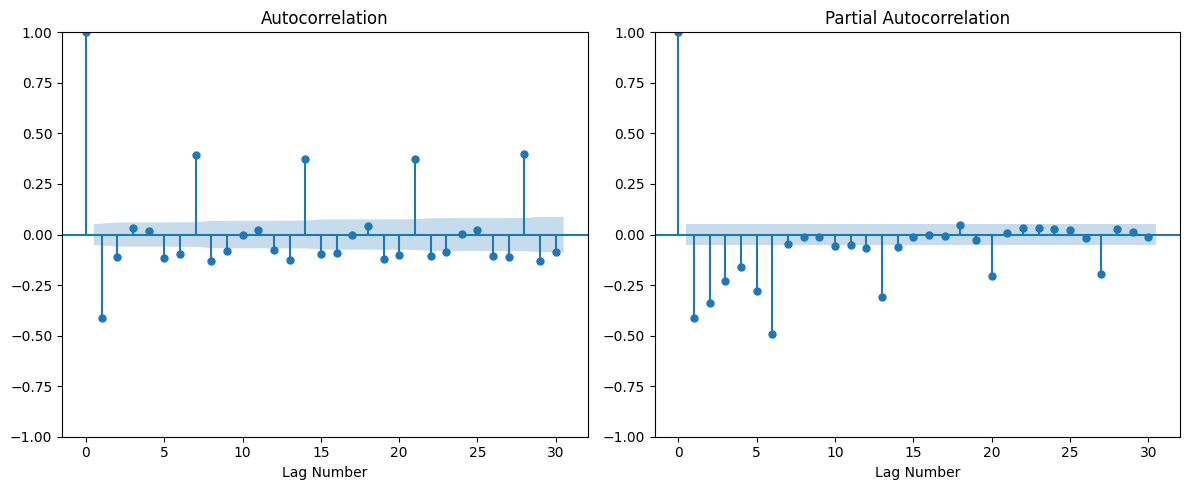

In [99]:
## ARIMA Model ##
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sales_log = np.log1p(sales_stat) #np.log crashes with 0 values. find reference
diff_sales = sales_log.diff().dropna()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(diff_sales, ax=plt.gca(), lags=30)
plt.xlabel("Lag Number")
plt.subplot(1,2,2)
plot_pacf(diff_sales, ax=plt.gca(), lags=30)
plt.xlabel("Lag Number")
plt.tight_layout()
plt.show()


In [125]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(diff_sales)*0.8)
train, test = diff_sales[:train_size], diff_sales[train_size:]
model = ARIMA(train, order=(1,0,1)) #on differenced data

model_fit = model.fit()
print(model_fit.summary())

fcst_diff = model_fit.get_forecast(steps=len(test)).predicted_mean
fcst_diff.index = test.index

# Reconstruct log-level forecast
baseline_pos = sales_log.index.get_loc(test.index[0]) - 1
last_log = sales_log.iloc[baseline_pos]
fcst_log = last_log + fcst_diff.cumsum()
true_log = sales_log.loc[fcst_log.index]

# Convert to original scale
y_true = np.expm1(true_log)
y_pred = np.expm1(fcst_log)

#evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)

nonzero = y_true > 1e-6
mape = np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100
mpe  = np.mean((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero]) * 100
print("=== ARIMA (trained on log-diffs, evaluated on original sales) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1165
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2854.572
Date:                Wed, 28 Jan 2026   AIC                           5717.143
Time:                        13:21:09   BIC                           5737.385
Sample:                    01-04-2015   HQIC                          5724.779
                         - 03-13-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.005      0.310      0.756      -0.008       0.011
ar.L1          0.0697      0.031      2.286      0.022       0.010       0.130
ma.L1         -0.9619      0.008   -120.942      0.0

reasoning for my p,d,q
since my data is stationary there is no differencing needed.
q is 1 because of the big spike at 1 and then it qucickly drops and stays in confidence zone
p is 1 coz of similar reason and might try 2 as well

In [111]:
# forecast = model_fit.forecast(steps=len(test))  # returns in log-scale
# forecast_actual = np.expm1(forecast)           # if log1p was used
# test_actual = np.expm1(test)                   # same for comparison
# forecast_log = model_fit.forecast(steps=len(test_actual))
# forecast_log.index = test_actual.index
# forecast_actual = np.expm1(forecast_log)   

# fcst_diff = model_fit.get_forecast(steps=len(test)).predicted_mean
# fcst_diff.index = test.index

# # Reconstruct log-level forecast
# last_log = sales_log.loc[train.index[-1]]
# fcst_log = last_log + fcst_diff.cumsum()

# # True log-levels
# true_log = sales_log.loc[test.index]

# # Convert to original scale
# y_true = np.expm1(true_log)
# y_pred = np.expm1(fcst_log)

# #evaluating
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# # Metrics
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# mae  = mean_absolute_error(y_true, y_pred)

# nonzero = y_true > 1e-6
# mape = np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100
# mpe  = np.mean((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero]) * 100
# print("=== ARIMA (on log-diffs, evaluated on original sales) ===")
# print(f"MAE : {mae:,.2f}")
# print(f"RMSE: {rmse:,.2f}")
# print(f"MAPE: {mape:.2f}%")
# print(f"MPE : {mpe:.2f}%")

In [44]:
# print(test_actual.index.dtype)
# print(forecast_actual.index.dtype)


In [45]:
# #evaluating
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# rmse = np.sqrt(mean_squared_error(test_actual, forecast_actual))
# mae = mean_absolute_error(test_actual, forecast_actual)
# non_zero_idx = test_actual != 0
# # mape = np.mean(np.abs((test_actual - forecast_actual) / test_actual)) * 100


# mape = np.mean(
#     np.abs((test_actual[non_zero_idx] - forecast_actual[non_zero_idx])
#            / test_actual[non_zero_idx])
# ) * 100
# eps = 1e-6  # numerical safety

# non_zero = np.abs(test_actual) > eps

# mpe = np.mean(
#     (test_actual[non_zero] - forecast_actual[non_zero]) / test_actual[non_zero]
# ) * 100

# # print("rmse:", rmse)
# # print("mae:", mae)
# # print("mape:", mape)

# print(f"MAE : {mae:,.2f}")
# print(f"RMSE: {rmse:,.2f}")
# print(f"MAPE: {mape:.2f}%")
# print(f"MPE : {mpe:.2f}%")

In [46]:
# residuals = model_fit.resid
# sns.histplot(residuals, kde=True)
# plt.title("Histogram of Residuals")
# plt.show()


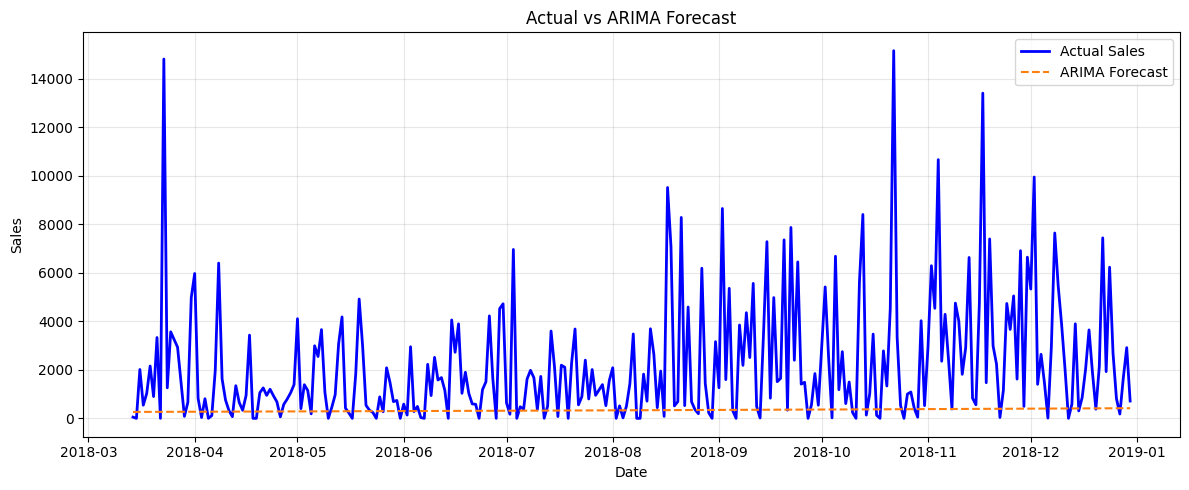

In [115]:
plt.figure(figsize=(12,5))
# plt.plot(test_actual, label="Actual Sales")
# plt.plot(forecast_actual, label="Predicted sales (ARIMA)", color="orange")
plt.plot(y_true.index, y_true.values, label="Actual Sales", color="blue", linewidth=2)
plt.plot(y_pred.index, y_pred.values, label="ARIMA Forecast", 
         linestyle="--", color="tab:orange")
plt.title("Actual vs ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(alpha=0.3)
plt.legend()
plt.grid(True); plt.tight_layout(); plt.show()

## SARIMA

In [145]:
result_Sa = adfuller(sales_log.dropna())

print("ADF Statistic:", result_Sa[0])
print("p-value:", result_Sa[1])
for key, value in result_Sa[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -4.700723929497519
p-value: 8.388966270965694e-05
Critical Value (1%): -3.434921564946909
Critical Value (5%): -2.8635590328954197
Critical Value (10%): -2.567844919904611


In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size_sa = int(len(sales_log)*0.8)
train_sa, test_sa = sales_log[:train_size_sa], sales_log[train_size_sa:]

model_sa = SARIMAX(train_sa, order=(1,1,2), seasonal_order=(1,1,1,7))
model_sa_fit = model_sa.fit(disp=False)

print(model_sa_fit.summary())



fcst_log_sa = model_sa_fit.get_forecast(steps=len(test_sa)).predicted_mean
fcst_log_sa.index = test_sa.index

# --- Reconstruct LOG-LEVEL forecast ---
# start_level_idx = test_sa.index[0] - pd.Timedelta(days=1) 
# last_log_sa = sales_log.loc[start_level_idx]          # last observed log-level before test starts
# fcst_log_sa = last_log_sa + fcst_diff_sa.cumsum()           # integrate (undo differencing)

# --- True LOG-LEVEL for the same test dates ---
# true_log_sa = sales_log.loc[test_sa.index]

y_true_sa = np.expm1(test_sa)
y_pred_sa = np.expm1(fcst_log_sa)

rmse_sa = np.sqrt(mean_squared_error(y_true_sa, y_pred_sa))
mae_sa  = mean_absolute_error(y_true_sa, y_pred_sa)

eps = 1e-6
nonzero_sa = y_true_sa > eps
mape_sa = np.mean(np.abs((y_true_sa[nonzero_sa] - y_pred_sa[nonzero_sa]) / y_true_sa[nonzero_sa])) * 100
mpe_sa  = np.mean((y_true_sa[nonzero_sa] - y_pred_sa[nonzero_sa]) / y_true_sa[nonzero_sa]) * 100

print("=== SARIMA (trained on log-diffs, evaluated on original sales) ===")
print(f"MAE : {mae_sa:,.2f}")
print(f"RMSE: {rmse_sa:,.2f}")
print(f"MAPE: {mape_sa:.2f}%")
print(f"MPE : {mpe_sa:.2f}%")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                 1166
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -2622.926
Date:                             Wed, 28 Jan 2026   AIC                           5257.851
Time:                                     21:49:39   BIC                           5288.178
Sample:                                 01-03-2015   HQIC                          5269.295
                                      - 03-13-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5589      0.510      1.096      0.273      -0.441       1.558
ma.L1         -1.4655      

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


perhaps there's no seasonal patterns like repeated spikes for Christmas. maybe I need to better analyse my seasonality or tune it for prophet

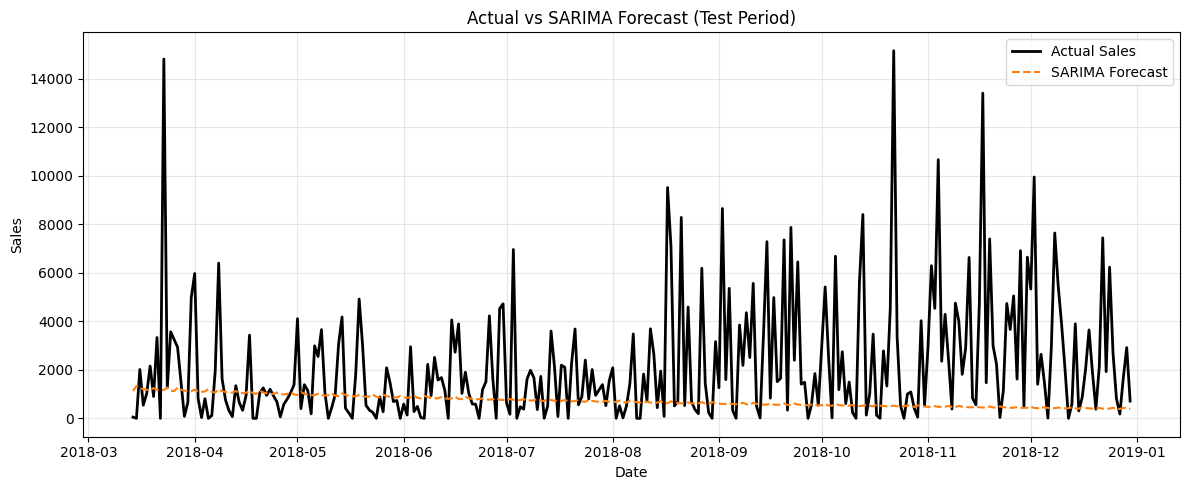

In [117]:
plt.figure(figsize=(12, 5))

plt.plot(y_true_sa.index, y_true_sa.values, label="Actual Sales", color="black", linewidth=2)
plt.plot(y_pred_sa.index, y_pred_sa.values, label="SARIMA Forecast", 
         linestyle="--", color="tab:orange")

plt.title("Actual vs SARIMA Forecast (Test Period)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Prophet

In [50]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from prophet.make_holidays import make_holidays_df

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


########################
### Random Temporal Split ###
########################

In [51]:
from sklearn.model_selection import train_test_split

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_68931/3760312104.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Sales"]
12:11:49 - cmdstanpy - INFO - Chain [1] start processing
12:11:49 - cmdstanpy - INFO - Chain [1] done processing


Random split Prophet results:
MAE : 11,259.07
RMSE: 14,044.12
MAPE: 39.46%
MPE : -3.29%


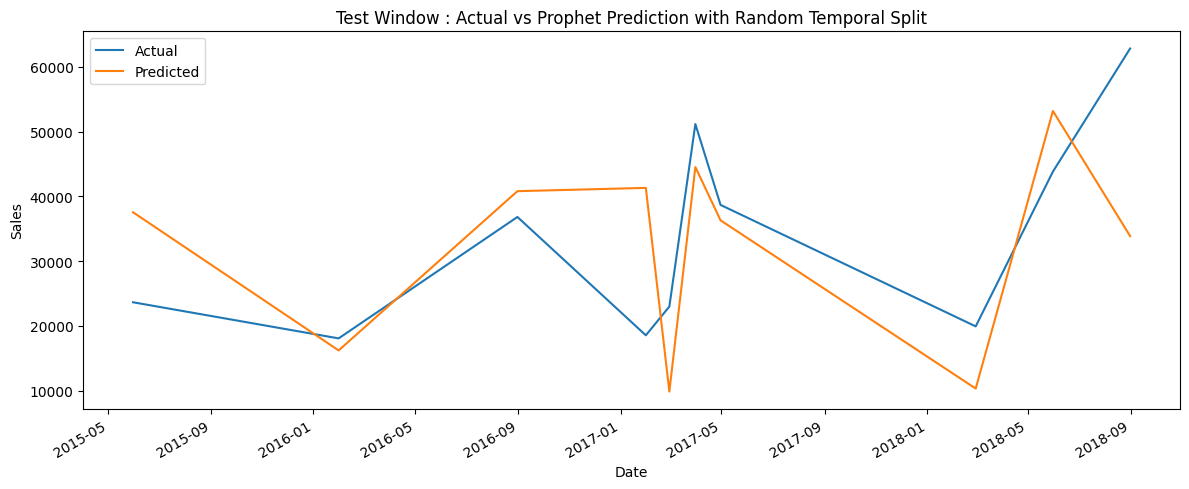

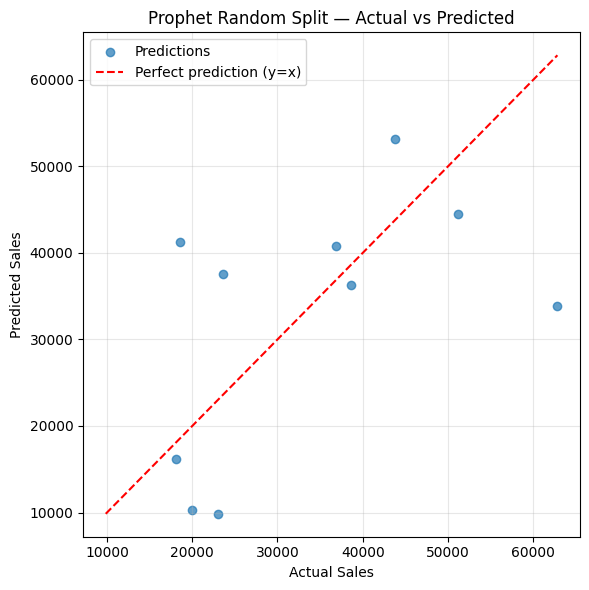

In [118]:
sales_daily_ppt = (
    retail_data
    .set_index("Order Date")
    .resample("M")["Sales"]
    .sum()
    .reset_index()
    .rename(columns={"Order Date": "ds", "Sales": "y"})
)

train_ppt, test_ppt = train_test_split(
    sales_daily_ppt,
    test_size=0.2, #20% test split
    shuffle=True,
    random_state=42
)

# Prophet still expects sorted data
train_ppt = train_ppt.sort_values("ds")
test_ppt  = test_ppt.sort_values("ds")

model_ppt = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)

model_ppt.fit(train_ppt)
fcst_ppt = model_ppt.predict(test_ppt[["ds"]])

pred_ppt = (fcst_ppt.set_index("ds")
            .loc[test_ppt["ds"], "yhat"]
            .rename("yhat"))

y_true = test_ppt["y"].values
y_pred = fcst_ppt["yhat"].values

mae_ppt  = mean_absolute_error(y_true, y_pred)
rmse_ppt = np.sqrt(mean_squared_error(y_true, y_pred))
mape_ppt = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe_ppt  = np.mean((y_true - y_pred) / y_true) * 100

print(f"Random split Prophet results:")
print(f"MAE : {mae_ppt:,.2f}")
print(f"RMSE: {rmse_ppt:,.2f}")
print(f"MAPE: {mape_ppt:.2f}%")
print(f"MPE : {mpe_ppt:.2f}%")

ax = test_ppt.set_index("ds")["y"].plot(figsize=(12,5), label="Actual")
pred_ppt.plot(ax=ax, label="Predicted")
plt.title("Test Window : Actual vs Prophet Prediction with Random Temporal Split")
plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.7, label="Predictions")

min_v = min(np.min(y_true), np.min(y_pred))
max_v = max(np.max(y_true), np.max(y_pred))
plt.plot([min_v, max_v], [min_v, max_v], "r--", label="Perfect prediction (y=x)")

plt.title("Prophet Random Split — Actual vs Predicted")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

########################
### Temporal 80/ 20 ###
########################

In [53]:
# sales_daily_ppt = (retail_data
#            .set_index("Order Date")
#            .resample("M")["Sales"] ##changed to monthly
#            .sum() ##chnaged to average
#            .reset_index()
#            .rename(columns={"Order Date": "ds", "Sales": "y"}))

# split_point = int(len(sales_daily_ppt)*0.8)
# train_ppt = sales_daily_ppt.iloc[:split_point]
# test_ppt = sales_daily_ppt.iloc[split_point:]

# model_ppt = Prophet(
#     yearly_seasonality=True,
#     # quarterly_seasonality = True, 
#     weekly_seasonality=False,  
#     daily_seasonality=False,
#     seasonality_mode="multiplicative",
#     changepoint_prior_scale=0.09, #0.097 and then 0.09
# )

# model_ppt.fit(train_ppt)
# future_ppt = model_ppt.make_future_dataframe(periods=len(test_ppt), freq="M", include_history=True)
# fcst_ppt = model_ppt.predict(future_ppt)

# pred_ppt = (fcst_ppt.set_index("ds")
#             .loc[test_ppt["ds"], "yhat"]
#             .rename("yhat"))

# mae_ppt  = mean_absolute_error(test_ppt["y"].values, pred_ppt.values)
# rmse_ppt = np.sqrt(((test_ppt["y"].values - pred_ppt.values) ** 2).mean())

# mask = test_ppt["y"] != 0 
# actuals = test_ppt.loc[mask, "y"].values
# preds = pred_ppt.loc[test_ppt.loc[mask, "ds"]].values
# mape_ppt = np.mean(np.abs((actuals - preds) / actuals)) * 100
# mpe_ppt = np.mean((actuals - preds) / actuals) * 100
# print(f"Temporal (80/20) split Prophet results:")
# print(f"MAE : {mae_ppt:,.2f}")
# print(f"RMSE: {rmse_ppt:,.2f}")
# print(f"MAPE: {mape_ppt:,.2f}%")
# print(f"MPE: {mpe_ppt:,.2f}%")

# ax = test_ppt.set_index("ds")["y"].plot(figsize=(12,5), label="Actual")
# pred_ppt.plot(ax=ax, label="Predicted")
# plt.title("Test Window : Actual vs Prophet Prediction with 80/20 Temporal Split")
# plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()


########################
### 50-50 split ###
########################

In [54]:
# sales_daily_ppt = (retail_data
#            .set_index("Order Date")
#            .resample("M")["Sales"] ##changed to monthly
#            .sum() ##chnaged to average
#            .reset_index()
#            .rename(columns={"Order Date": "ds", "Sales": "y"}))

# train_ppt = sales_daily_ppt[sales_daily_ppt["ds"].dt.year <= 2016]
# test_ppt  = sales_daily_ppt[sales_daily_ppt["ds"].dt.year >= 2017]

# # # Ensure sorting
# train_ppt = train_ppt.sort_values("ds")
# test_ppt = test_ppt.sort_values("ds")

# model_ppt = Prophet(
#     yearly_seasonality=True,
#     # quarterly_seasonality = True, 
#     weekly_seasonality=False,  
#     daily_seasonality=False,
#     seasonality_mode="multiplicative",
#     changepoint_prior_scale=0.09, #0.097 and then 0.09
# )
# model_ppt.fit(train_ppt)

# future_ppt = model_ppt.make_future_dataframe(periods=len(test_ppt), freq="M", include_history=True)
# fcst_ppt = model_ppt.predict(future_ppt)

# pred_ppt = (fcst_ppt.set_index("ds")
#             .loc[test_ppt["ds"], "yhat"]
#             .rename("yhat"))

# mae_ppt  = mean_absolute_error(test_ppt["y"].values, pred_ppt.values)
# rmse_ppt = np.sqrt(((test_ppt["y"].values - pred_ppt.values) ** 2).mean())

# mask = test_ppt["y"] != 0 
# actuals = test_ppt.loc[mask, "y"].values
# preds = pred_ppt.loc[test_ppt.loc[mask, "ds"]].values
# mape_ppt = np.mean(np.abs((actuals - preds) / actuals)) * 100
# mpe_ppt = np.mean((actuals - preds) / actuals) * 100
# print(f"Temporal (50/50) split Prophet results:")
# print(f"MAE : {mae_ppt:,.2f}")
# print(f"RMSE: {rmse_ppt:,.2f}")
# print(f"MAPE: {mape_ppt:,.2f}%")
# print(f"MPE: {mpe_ppt:,.2f}%")


# ax = test_ppt.set_index("ds")["y"].plot(figsize=(12,5), label="Actual")
# pred_ppt.plot(ax=ax, label="Predicted")
# plt.title("Test Window : Actual vs Prophet Prediction with 50/50 Temporal Split")
# plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()

########################
### Year-based 75-25 split ###
########################

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_68931/907692507.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Sales"] ##changed to monthly
12:11:56 - cmdstanpy - INFO - Chain [1] start processing
12:11:57 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Temporal (75/25) split Prophet results:
MAE : 12,340.15
RMSE: 15,600.55
MAPE: 21.01%
MPE: 12.67%


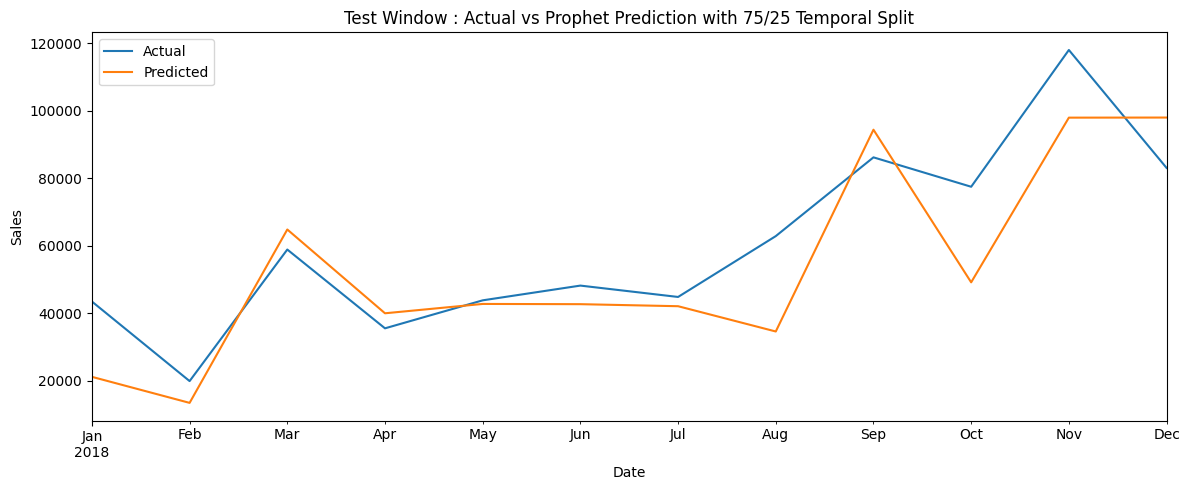

In [119]:
sales_daily_ppt = (retail_data
           .set_index("Order Date")
           .resample("M")["Sales"] ##changed to monthly
           .sum() ##chnaged to average
           .reset_index()
           .rename(columns={"Order Date": "ds", "Sales": "y"}))

train_ppt = sales_daily_ppt[sales_daily_ppt["ds"].dt.year <= 2017]
test_ppt  = sales_daily_ppt[sales_daily_ppt["ds"].dt.year >= 2018]
# split_point = int(len(sales_daily_ppt)*0.75)
# train_ppt = sales_daily_ppt.iloc[:split_point]
# test_ppt = sales_daily_ppt.iloc[split_point:]

# # Ensure sorting
train_ppt = train_ppt.sort_values("ds")
test_ppt = test_ppt.sort_values("ds")

model_ppt = Prophet(
    yearly_seasonality=True,
    # quarterly_seasonality = True, 
    weekly_seasonality=False,  
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09, #0.097 and then 0.09
)
model_ppt.fit(train_ppt)

future_ppt = model_ppt.make_future_dataframe(periods=len(test_ppt), freq="M", include_history=True)
fcst_ppt = model_ppt.predict(future_ppt)

pred_ppt = (fcst_ppt.set_index("ds")
            .loc[test_ppt["ds"], "yhat"]
            .rename("yhat"))

mae_ppt  = mean_absolute_error(test_ppt["y"].values, pred_ppt.values)
rmse_ppt = np.sqrt(((test_ppt["y"].values - pred_ppt.values) ** 2).mean())

mask = test_ppt["y"] != 0 
actuals = test_ppt.loc[mask, "y"].values
preds = pred_ppt.loc[test_ppt.loc[mask, "ds"]].values
mape_ppt = np.mean(np.abs((actuals - preds) / actuals)) * 100
mpe_ppt = np.mean((actuals - preds) / actuals) * 100
print(f"Temporal (75/25) split Prophet results:")
print(f"MAE : {mae_ppt:,.2f}")
print(f"RMSE: {rmse_ppt:,.2f}")
print(f"MAPE: {mape_ppt:,.2f}%")
print(f"MPE: {mpe_ppt:,.2f}%")

ax = test_ppt.set_index("ds")["y"].plot(figsize=(12,5), label="Actual")
pred_ppt.plot(ax=ax, label="Predicted")
plt.title("Test Window : Actual vs Prophet Prediction with 75/25 Temporal Split")
plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()

########################
### Feature Engineering with 80/20 split ###
########################

In [129]:
sales_daily_ppt = (retail_data
           .set_index("Order Date")
           .resample("M")["Sales"] ##changed to monthly
           .sum() ##chnaged to average
           .reset_index()
           .rename(columns={"Order Date": "ds", "Sales": "y"}))

# sales_daily["ds"] = pd.to_datetime(sales_daily["ds"])
# sales_daily["y"]  = pd.to_numeric(sales_daily["y"], errors="coerce")
# sales_daily = sales_daily.dropna(subset=["ds","y"])

########################
## Enforcing features ##
########################
sales_daily_ppt = sales_daily_ppt.copy()
sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year

# # ---- “Holiday / end-of-year” style regressors ----
sales_daily_ppt["is_black_friday"] = (sales_daily_ppt["month"] == 11).astype(int)        # November
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)         # often a slump
# sales_daily_ppt["is_q4"]           = sales_daily_ppt["month"].isin([10, 11, 12]).astype(int)

#################
## 80/20 split ##
#################
split_point = int(len(sales_daily_ppt)*0.8)
train_ppt = sales_daily_ppt.iloc[:split_point]
test_ppt = sales_daily_ppt.iloc[split_point:]

######################
## year based split ##
######################
# train_ppt = sales_daily_ppt[sales_daily_ppt["ds"].dt.year <= 2016]
# test_ppt  = sales_daily_ppt[sales_daily_ppt["ds"].dt.year >= 2017]
# train_ppt = sales_daily_ppt[sales_daily_ppt["ds"].dt.year <= 2017]
# test_ppt  = sales_daily_ppt[sales_daily_ppt["ds"].dt.year >= 2018]

# # # Ensure sorting
# train_ppt = train_ppt.sort_values("ds")
# test_ppt = test_ppt.sort_values("ds")



# X_train = train.drop(columns=["ds"])
# y_train = train["y"]

# X_test = test.drop(columns=["ds"])
# y_test = test["y"]

# print(f"Train shape: {train.shape}")
# print(f"Test shape: {test.shape}")
freq = pd.infer_freq(sales_daily_ppt["ds"])
if freq is None:
    freq = "M" ##frequency taken at monthly


model_ppt = Prophet(
    yearly_seasonality=True,
    # quarterly_seasonality = True, 
    weekly_seasonality=False,  
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09, #0.097 and then 0.09
)
# model_ppt.add_seasonality(
#     name="yearly",
#     period=365.25,
#     fourier_order=4
# )
model_ppt.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

## adding holiday regressor ## === additional feature
model_ppt.add_regressor("is_black_friday", mode="multiplicative")
model_ppt.add_regressor("is_september",     mode="multiplicative")
model_ppt.add_regressor("is_november",     mode="multiplicative")
model_ppt.add_regressor("is_december",     mode="multiplicative")
model_ppt.add_regressor("is_january",      mode="additive")
# model_ppt.add_regressor("is_q4",           mode="multiplicative")

model_ppt.add_country_holidays(country_name='UK') #adding holiday doesnt make much difference when working with monthly aggregate

# model_ppt.fit(train_ppt) ## orginal fit, USE THIS TO REVERSE
model_ppt.fit(train_ppt[["ds", "y","is_black_friday", "is_september","is_november","is_december", "is_january"]]) #, "is_q4"


/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_68931/239805031.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Sales"] ##changed to monthly
13:56:48 - cmdstanpy - INFO - Chain [1] start processing
13:56:48 - cmdstanpy - INFO - Chain [1] done processing


This value was selected empirically via hyperparameter tuning, as lower orders (2) consistently outperformed higher orders (5, 7, 10) on the out-of-sample test set. A smaller Fourier order produces a smoother seasonal pattern and helps avoid overfitting, which is appropriate given the limited length of the monthly time series.

In [134]:
future = model_ppt.make_future_dataframe(periods=len(test_ppt), freq=freq, include_history=True)

########################
## Enforcing features ##
########################
future["month"] = future["ds"].dt.month
future["is_black_friday"] = (future["month"] == 11).astype(int)
future["is_september"]     = (future["month"] == 9).astype(int)
future["is_november"]     = (future["month"] == 11).astype(int)
future["is_december"]     = (future["month"] == 12).astype(int)
future["is_january"]      = (future["month"] == 1).astype(int)
# future["is_q4"]           = future["month"].isin([10, 11, 12]).astype(int)

# Keep only needed columns
future = future[["ds","is_black_friday", "is_september","is_november","is_december", "is_january"]] #, "is_q4"

fcst = model_ppt.predict(future)

pred_ppt = (fcst.set_index("ds")
            .loc[test_ppt["ds"], "yhat"]
            .rename("yhat"))

mae_ppt  = mean_absolute_error(test_ppt["y"].values, pred_ppt.values)
rmse_ppt = np.sqrt(((test_ppt["y"].values - pred_ppt.values) ** 2).mean())

mask = test_ppt["y"] != 0 
actuals = test_ppt.loc[mask, "y"].values
preds = pred_ppt.loc[test_ppt.loc[mask, "ds"]].values
mape_ppt = np.mean(np.abs((actuals - preds) / actuals)) * 100
mpe_ppt = np.mean((actuals - preds) / actuals) * 100
print(f"MAE : {mae_ppt:,.2f}")
print(f"RMSE: {rmse_ppt:,.2f}")
print(f"MAPE: {mape_ppt:,.2f}%")
print(f"MPE: {mpe_ppt:,.2f}%")

MAE : 10,840.32
RMSE: 13,166.61
MAPE: 16.50%
MPE: 2.39%


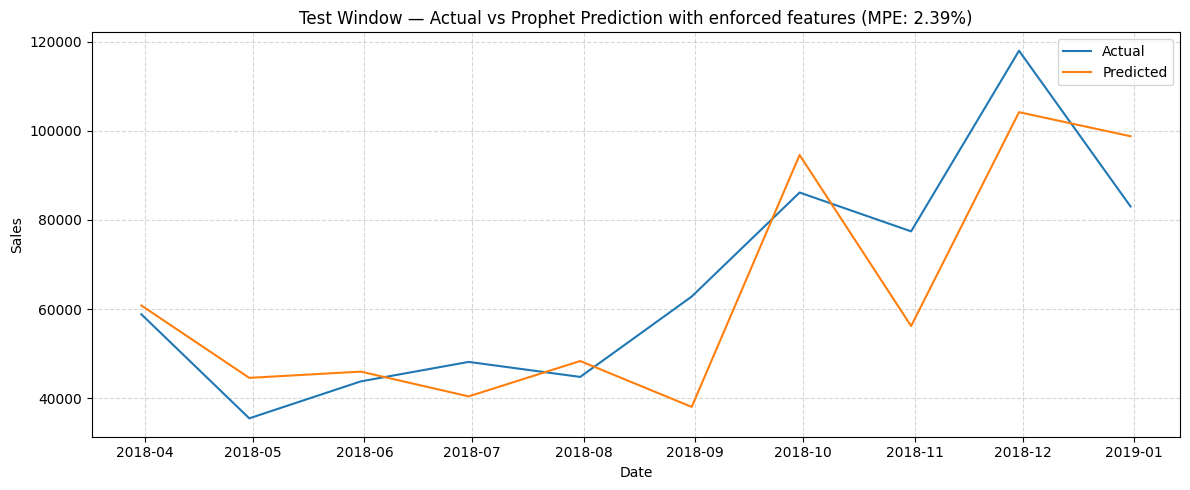

In [137]:
import matplotlib.dates as mdates
test_dates = pd.to_datetime(test_ppt["ds"])

actual = pd.Series(test_ppt["y"].values, index=test_dates, name="Actual")
pred   = pd.Series(pred_ppt.values, index=test_dates, name="Predicted")

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(actual.index, actual.values, label="Actual")
ax.plot(pred.index, pred.values, label="Predicted")

ax.set_title("Test Window — Actual vs Prophet Prediction with enforced features (MPE: 2.39%)")
ax.set_xlabel("Date")
ax.set_ylabel("Sales")
ax.legend()

# Proper monthly formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks()
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [59]:
print("Any zeros in actuals?", (test_ppt["y"] == 0).sum())
print("Min actual:", test_ppt["y"].min())

Any zeros in actuals? 0
Min actual: 35541.9101


In [60]:
# model_ppt.plot_components(fcst)

In [131]:
## ORIG PROPHET PLOT ##
# 
# # ax = test_ppt.set_index("ds")["y"].plot(figsize=(12,5), label="Actual")
# pred_ppt.plot(ax=ax, label="Predicted")
# plt.title("Test Window - Actual vs Prophet Prediction with enforced features (MPE: 2.39%)")
# plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()

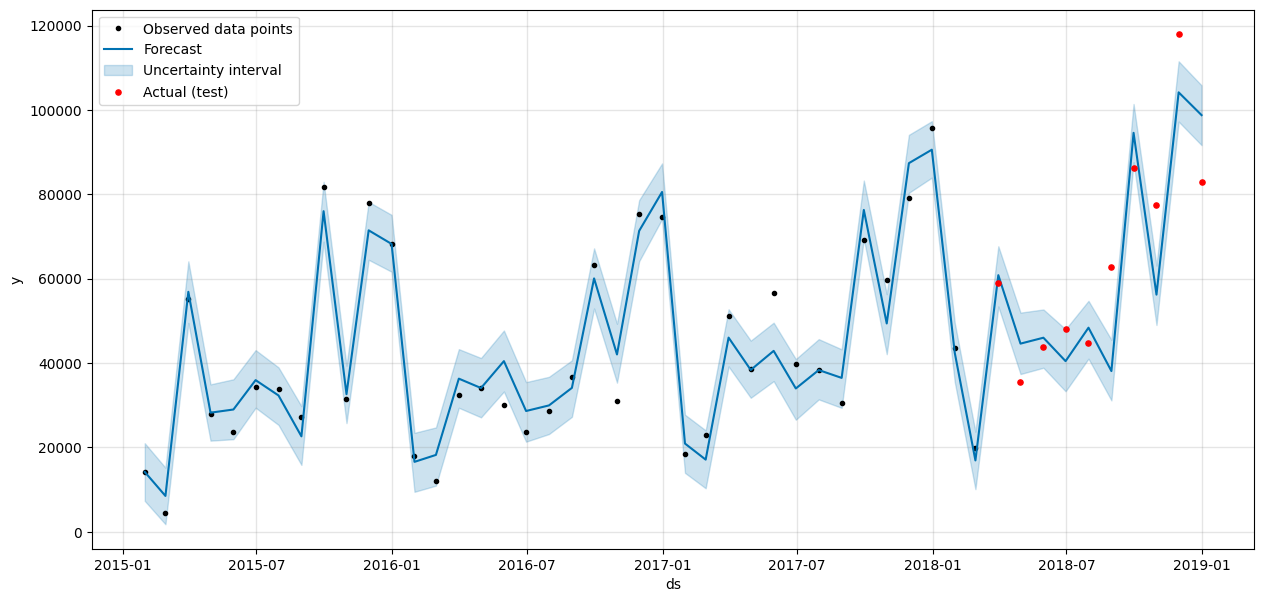

In [62]:
fig, ax = plt.subplots(figsize=(15, 7))
model_ppt.plot(fcst, ax=ax)
ax.scatter(test_ppt['ds'], test_ppt['y'], color='r', s=14, label='Actual (test)', zorder=3)
ax.legend()
plt.show()

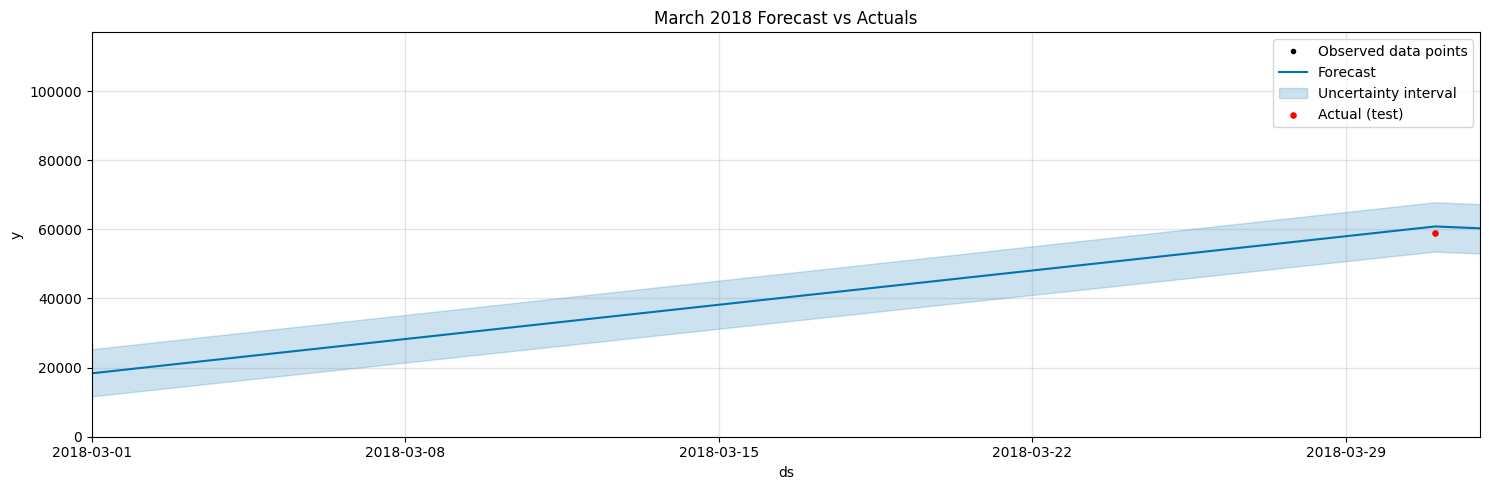

In [63]:
first_month = test_ppt['ds'].dt.to_period('M').iloc[0]
start = first_month.to_timestamp(how='start')
end   = (first_month + 1).to_timestamp(how='start')

test_m = (test_ppt[(test_ppt['ds'] >= start) & (test_ppt['ds'] < end)]
          .set_index('ds')
          .sort_index())


fcst_m = fcst[(fcst['ds'] >= start) & (fcst['ds'] < end)]

fig, ax = plt.subplots(figsize=(15,5))
model_ppt.plot(fcst, ax=ax)
ax.set_xlim(start, end)
ax.scatter(test_m.index, test_m['y'], color='r', s=14, label='Actual (test)', zorder=3)
ax.set_ylim(bottom=0)
ax.set_title(f"{first_month.strftime('%B %Y')} Forecast vs Actuals")
ax.legend()
plt.tight_layout(); plt.show()

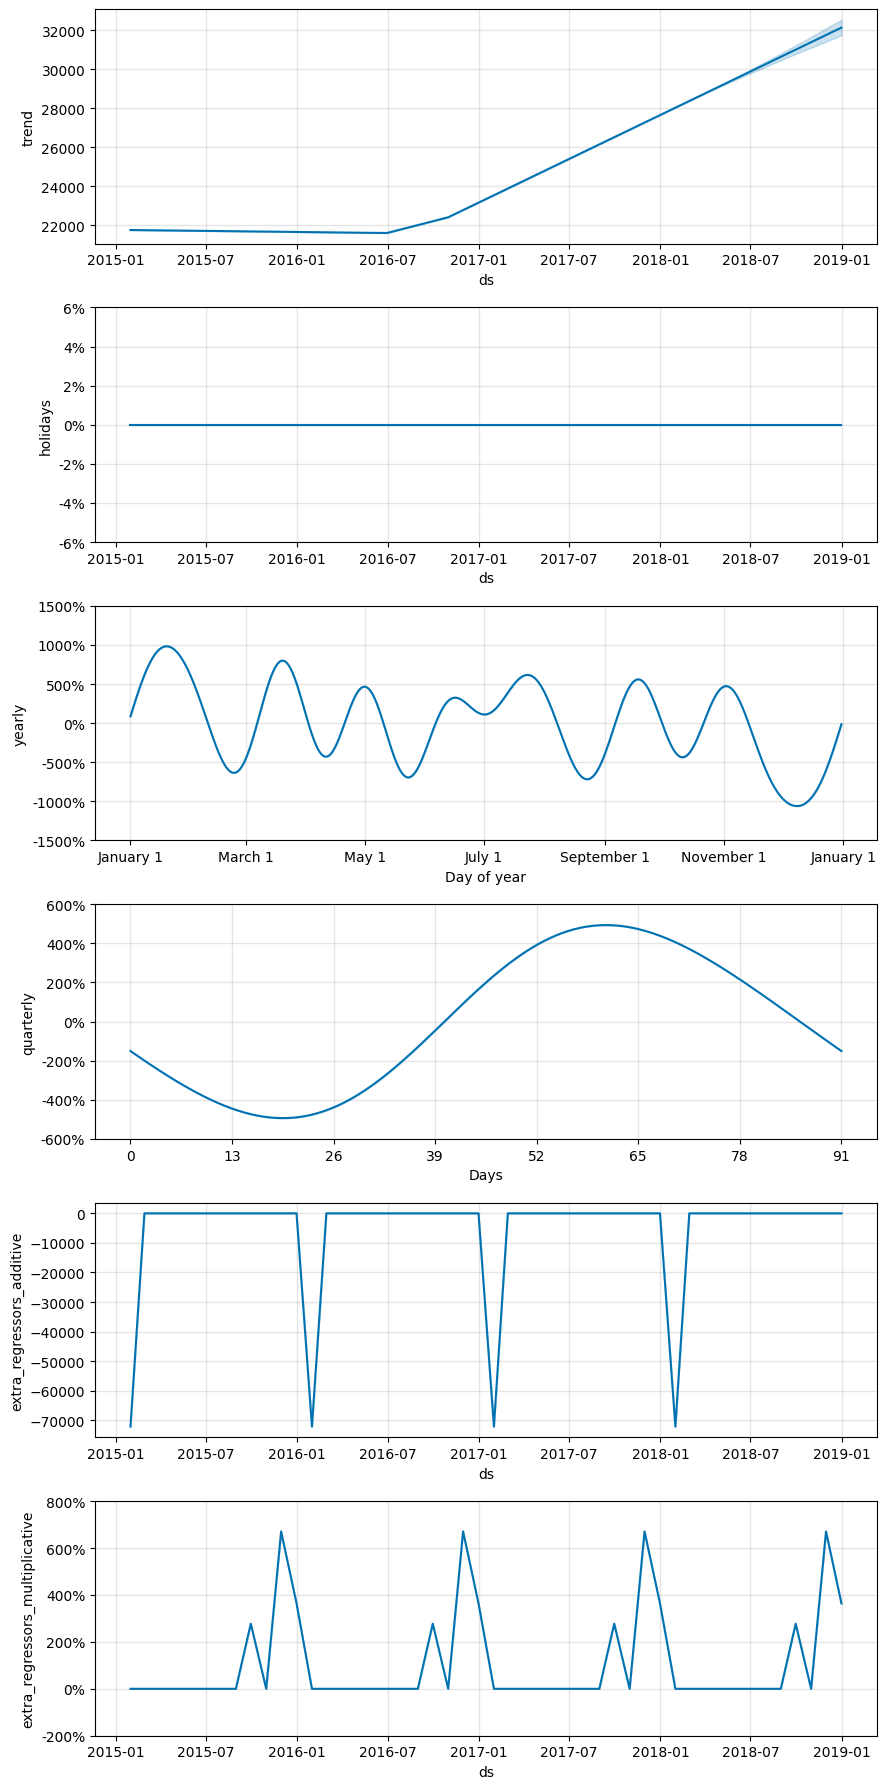

In [64]:
fig = model_ppt.plot_components(fcst)

## XGBoost

##need lag features, rolling statistics, date-based features

In [65]:
pip install xgboost 


Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error
import optuna
import holidays

###############################
### XGB baseline Random Split ##
###############################

In [68]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)


# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X = sales_daily_xgb[features]
# y = sales_daily_xgb["log_y"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     shuffle=True,
#     random_state=42
# )


# model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
#                         max_depth=5,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         random_state=42)
# model_xgb.fit(X_train, y_train)

# # THIS IS WITH LOG TRANSOFRMATION
# log_pred = model_xgb.predict(X_test)
# y_pred = np.expm1(log_pred)  
# y_true = np.expm1(y_test)

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))

# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100
# print(f"MAE: {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")


# plt.figure(figsize=(8,6))
# # Scatter points
# plt.scatter(
#     y_true, y_pred,
#     alpha=0.7,
#     label="Predictions"
# )

# plt.plot([y_true.min(), y_true.max()],
#          [y_true.min(), y_true.max()],
#          "r--",
#          label="Perfect prediction (y = x)"
# )

# plt.xlabel("Actual Sales")
# plt.ylabel("Predicted Sales")
# plt.title("XGBoost Random Split – Actual vs Predicted")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


########################
### XGB baseline 80/20 ###
########################

In [69]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# split = int(len(sales_daily_xgb) * 0.8)
# train_xgb = sales_daily_xgb.iloc[:split]
# test_xgb = sales_daily_xgb.iloc[split:]

# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
#                         max_depth=5,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         random_state=42)
# model_xgb.fit(X_train, y_train)

# # THIS IS WITH LOG TRANSOFRMATION
# log_pred = model_xgb.predict(X_test)
# y_pred = np.expm1(log_pred)  
# y_true = np.expm1(y_test)

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))

# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100
# print(f"MAE: {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted XGBoost Baseline with 80/20 Temporal Split", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()


#########################
### XGB baseline 75/25 ###
#########################

In [70]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
# test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]
# # split = int(len(sales_daily_xgb) * 0.75)
# # train_xgb = sales_daily_xgb.iloc[:split]
# # test_xgb = sales_daily_xgb.iloc[split:]

# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
#                         max_depth=5,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         random_state=42)
# model_xgb.fit(X_train, y_train)

# # THIS IS WITH LOG TRANSOFRMATION
# log_pred = model_xgb.predict(X_test)
# y_pred = np.expm1(log_pred)  
# y_true = np.expm1(y_test)

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))

# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100
# print(f"MAE: {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted XGBoost Baseline with 75/25 Temporal Split", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

#########################
### XGB baseline 50/50 ###
#########################

In [71]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2016]
# test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] >= 2017]

# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
#                         max_depth=5,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         random_state=42)
# model_xgb.fit(X_train, y_train)

# # THIS IS WITH LOG TRANSOFRMATION
# log_pred = model_xgb.predict(X_test)
# y_pred = np.expm1(log_pred)  
# y_true = np.expm1(y_test)

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))

# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100
# print(f"MAE: {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted XGBoost Baseline with 50/50 Temporal Split", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

############################################
### XGB baseline 80/20 - RS Optimisation ###
############################################

In [72]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# split = int(len(sales_daily_xgb) * 0.8)
# train_xgb = sales_daily_xgb.iloc[:split]
# test_xgb = sales_daily_xgb.iloc[split:]

# features = [
#     "year","month",
#     # "quarter",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# tscv = TimeSeriesSplit(n_splits=3) #This ensures training folds always occur before validation folds, avoiding leakage.

# param_grid = {
#     "n_estimators": [300, 600, 1000, 1500],
#     "learning_rate": [0.01, 0.03, 0.05, 0.1],
#     "max_depth": [3, 4, 5, 6, 8],
#     "min_child_weight": [1, 2, 5, 10],
#     "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
#     "gamma": [0, 0.01, 0.1, 0.5],
#     "reg_alpha": [0, 0.01, 0.1, 1],
#     "reg_lambda": [0.1, 1, 5, 10]
# }

# xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=30,
#     scoring="neg_mean_absolute_error",
#     cv=tscv,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# search.fit(X_train, y_train)

# best_model = search.best_estimator_
# print("Best params:", search.best_params_)

# # THIS IS WITH LOG TRANSFORMATION
# log_pred = best_model.predict(X_test)
# y_pred = np.expm1(log_pred)     # back-transform to original scale

# # true values in original scale
# y_true = test_xgb["y"]

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))
# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100


# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted XGBoost Baseline with Random Search", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

############################################
### XGB baseline 75/25 - RS Optimisation ###
############################################

In [73]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
# test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]

# features = [
#     "year","month",
#     # "quarter",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# tscv = TimeSeriesSplit(n_splits=3) #This ensures training folds always occur before validation folds, avoiding leakage.

# param_grid = {
#     "n_estimators": [300, 600, 1000, 1500],
#     "learning_rate": [0.01, 0.03, 0.05, 0.1],
#     "max_depth": [3, 4, 5, 6, 8],
#     "min_child_weight": [1, 2, 5, 10],
#     "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
#     "gamma": [0, 0.01, 0.1, 0.5],
#     "reg_alpha": [0, 0.01, 0.1, 1],
#     "reg_lambda": [0.1, 1, 5, 10]
# }

# xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=30,
#     scoring="neg_mean_absolute_error",
#     cv=tscv,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# search.fit(X_train, y_train)

# best_model = search.best_estimator_
# print("Best params:", search.best_params_)

# # THIS IS WITH LOG TRANSFORMATION
# log_pred = best_model.predict(X_test)
# y_pred = np.expm1(log_pred)     # back-transform to original scale

# # true values in original scale
# y_true = test_xgb["y"]

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))
# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100


# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted XGBoost Baseline with Random Search", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

############################################
### XGB baseline 80/20 - TPE Optimisation ###
############################################

In [74]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# split = int(len(sales_daily_xgb) * 0.8)
# train_xgb = sales_daily_xgb.iloc[:split]
# test_xgb = sales_daily_xgb.iloc[split:]

# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# def objective(trial):
#     # Suggest hyperparameters
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 8),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 0.5),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
#         "random_state": 42,
#         "objective": "reg:squarederror"
#     }

#     model_xgb = XGBRegressor(**params)

#     # Single hold-out validation split
#     split = int(len(X_train) * 0.8)
#     X_tr, X_val = X_train.iloc[:split], X_train.iloc[split:]
#     y_tr, y_val = y_train.iloc[:split], y_train.iloc[split:]

#     y_tr = y_tr.values.ravel()
#     y_val = y_val.values.ravel()
    
#     model_xgb.fit(X_tr, y_tr)

#     preds_xgb = model_xgb.predict(X_val)
#     preds_xgb = np.array(preds_xgb).ravel()   # ensure 1D

#     mae_xgb = mean_absolute_error(y_val, preds_xgb)
#     return float(mae_xgb)

# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
# study.optimize(objective, n_trials=50)   # increase to 50–100 if you have time

# print("Best trial:", study.best_trial.number)
# print("Best value (MAE):", study.best_trial.value)
# print("Best params:", study.best_trial.params)

# best_params = study.best_trial.params
# best_params["objective"] = "reg:squarederror"
# best_params["random_state"] = 42

# best_xgb_tpe = XGBRegressor(**best_params)
# best_xgb_tpe.fit(X_train, y_train)

# # y_pred = best_xgb_tpe.predict(X_test)

# pred_log_xgb = best_xgb_tpe.predict(X_test)
# pred_xgb = np.expm1(pred_log_xgb)       # back-transform
# actual_xgb = np.expm1(y_test)

# mae_xgb = mean_absolute_error(actual_xgb, pred_xgb)
# rmse_xgb = np.sqrt(mean_squared_error(actual_xgb, pred_xgb))
# mape_xgb = np.mean(np.abs((actual_xgb - pred_xgb) / actual_xgb)) * 100
# mpe_xgb = np.mean((actual_xgb - pred_xgb) / actual_xgb) * 100

# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(12,5))
# plt.plot(test_xgb["ds"], actual_xgb, label="Actual")
# plt.plot(test_xgb["ds"], pred_xgb, label="Predicted")
# plt.title("Actual vs Predicted XGBoost Baseline with Bayesian Tree Parzen Estimators (TPE)")
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.legend()
# plt.tight_layout()
# plt.show()

############################################
### XGB baseline 75/25 - TPE Optimisation ###
############################################

In [75]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# # sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# # sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# # sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
# test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]

# features = [
#     "year","month",
#     "lag_1",
#     # "lag_2","lag_3","lag_6",
#     "lag_12"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# def objective(trial):
#     # Suggest hyperparameters
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 8),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 0.5),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
#         "random_state": 42,
#         "objective": "reg:squarederror"
#     }

#     model_xgb = XGBRegressor(**params)

#     # Single hold-out validation split
#     split = int(len(X_train) * 0.8)
#     X_tr, X_val = X_train.iloc[:split], X_train.iloc[split:]
#     y_tr, y_val = y_train.iloc[:split], y_train.iloc[split:]

#     y_tr = y_tr.values.ravel()
#     y_val = y_val.values.ravel()
    
#     model_xgb.fit(X_tr, y_tr)

#     preds_xgb = model_xgb.predict(X_val)
#     preds_xgb = np.array(preds_xgb).ravel()   # ensure 1D

#     mae_xgb = mean_absolute_error(y_val, preds_xgb)
#     return float(mae_xgb)

# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
# study.optimize(objective, n_trials=50)   # increase to 50–100 if you have time

# print("Best trial:", study.best_trial.number)
# print("Best value (MAE):", study.best_trial.value)
# print("Best params:", study.best_trial.params)

# best_params = study.best_trial.params
# best_params["objective"] = "reg:squarederror"
# best_params["random_state"] = 42

# best_xgb_tpe = XGBRegressor(**best_params)
# best_xgb_tpe.fit(X_train, y_train)

# # y_pred = best_xgb_tpe.predict(X_test)

# pred_log_xgb = best_xgb_tpe.predict(X_test)
# pred_xgb = np.expm1(pred_log_xgb)       # back-transform
# actual_xgb = np.expm1(y_test)

# mae_xgb = mean_absolute_error(actual_xgb, pred_xgb)
# rmse_xgb = np.sqrt(mean_squared_error(actual_xgb, pred_xgb))
# mape_xgb = np.mean(np.abs((actual_xgb - pred_xgb) / actual_xgb)) * 100
# mpe_xgb = np.mean((actual_xgb - pred_xgb) / actual_xgb) * 100

# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# plt.figure(figsize=(12,5))
# plt.plot(test_xgb["ds"], actual_xgb, label="Actual")
# plt.plot(test_xgb["ds"], pred_xgb, label="Predicted")
# plt.title("Actual vs Predicted XGBoost Baseline with Bayesian Tree Parzen Estimators (TPE)")
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.legend()
# plt.tight_layout()
# plt.show()

# XGB 80/20 TPE Feature Engineering #

In [76]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# # sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)

# # sales_daily_xgb["roll_mean_1"] = sales_daily_xgb["y"].shift(1).rolling(1).mean()
# # sales_daily_xgb["roll_mean_3"] = sales_daily_xgb["y"].shift(1).rolling(3).mean()
# # sales_daily_xgb["roll_mean_6"] = sales_daily_xgb["y"].shift(1).rolling(6).mean()
# sales_daily_xgb["roll_mean_12"] = sales_daily_xgb["y"].shift(1).rolling(12).mean()
# # sales_daily_xgb["roll_std_3"] = sales_daily_xgb["y"].shift(1).rolling(3).std()
# sales_daily_xgb["roll_std_6"] = sales_daily_xgb["y"].shift(1).rolling(6).std()
# # sales_daily_xgb["roll_std_12"] = sales_daily_xgb["y"].shift(1).rolling(12).std()

# sales_daily_xgb["is_month_start"] = sales_daily_xgb["ds"].dt.is_month_start.astype(int)
# sales_daily_xgb["is_month_end"] = sales_daily_xgb["ds"].dt.is_month_end.astype(int)
# # sales_daily_xgb["month_sin"] = np.sin(2 * np.pi * sales_daily_xgb["month"] / 12)
# # sales_daily_xgb["month_cos"] = np.cos(2 * np.pi * sales_daily_xgb["month"] / 12)

# # sales_daily_xgb["is_september"] = (sales_daily_xgb["month"] == 9).astype(int)
# # sales_daily_xgb["is_novemeber"] = (sales_daily_xgb["month"] == 11).astype(int)
# # sales_daily_xgb["is_december"] = (sales_daily_xgb["month"] == 12).astype(int)
# # sales_daily_xgb["is_black_friday"] = sales_daily_xgb["month"].isin([11]).astype(int)

# # uk_holidays = holidays.UnitedKingdom()
# # sales_daily_xgb["is_holiday"] = sales_daily_xgb["ds"].dt.date.apply(
# #     lambda x: 1 if x in uk_holidays else 0
# # )

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

# split = int(len(sales_daily_xgb) * 0.8)
# train_xgb = sales_daily_xgb.iloc[:split]
# test_xgb = sales_daily_xgb.iloc[split:]

# features = [
#     "year","month",
#     "quarter",
#     "lag_1",
#     # "lag_2",
#     "lag_3","lag_6",
#     "lag_12",
#     # "roll_mean_1",
#     # "roll_mean_3",
#     # "roll_mean_6",
#     "roll_mean_12",
#     # "roll_std_3",
#     "roll_std_6",
#     # "roll_std_12",
#     "is_month_start", "is_month_end",
#     # "month_sin", "month_cos",
#     # "is_september",
#     # "is_november",
#     # "is_december",
#     # "is_black_friday",
#     # "is_holiday"
# ]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# def objective(trial):
#     # Suggest hyperparameters
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 8),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 0.5),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
#         "random_state": 42,
#         "objective": "reg:squarederror"
#     }

#     model_xgb = XGBRegressor(**params)

#     # Single hold-out validation split
#     split = int(len(X_train) * 0.8)
#     X_tr, X_val = X_train.iloc[:split], X_train.iloc[split:]
#     y_tr, y_val = y_train.iloc[:split], y_train.iloc[split:]

#     y_tr = y_tr.values.ravel()
#     y_val = y_val.values.ravel()
    
#     model_xgb.fit(X_tr, y_tr)

#     preds_xgb = model_xgb.predict(X_val)
#     preds_xgb = np.array(preds_xgb).ravel()   # ensure 1D

#     mae_xgb = mean_absolute_error(y_val, preds_xgb)
#     return float(mae_xgb)

# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=42))
# study.optimize(objective, n_trials=50)   # increase to 50–100 if you have time

# print("Best trial:", study.best_trial.number)
# print("Best value (MAE):", study.best_trial.value)
# print("Best params:", study.best_trial.params)

# best_params = study.best_trial.params
# best_params["objective"] = "reg:squarederror"
# best_params["random_state"] = 42

# best_xgb_tpe = XGBRegressor(**best_params)
# best_xgb_tpe.fit(X_train, y_train)

# # y_pred = best_xgb_tpe.predict(X_test)

# pred_log_xgb = best_xgb_tpe.predict(X_test)
# pred_xgb = np.expm1(pred_log_xgb)       # back-transform
# actual_xgb = np.expm1(y_test)

# mae_xgb = mean_absolute_error(actual_xgb, pred_xgb)
# rmse_xgb = np.sqrt(mean_squared_error(actual_xgb, pred_xgb))
# mape_xgb = np.mean(np.abs((actual_xgb - pred_xgb) / actual_xgb)) * 100
# mpe_xgb = np.mean((actual_xgb - pred_xgb) / actual_xgb) * 100
# rmsle_xgb = np.sqrt(mean_squared_log_error(actual_xgb, pred_xgb))

# # pred_log_xgb = best_xgb_tpe.predict(X_test)
# # # pred_xgb = np.expm1(pred_log_xgb)       # back-transform
# # # actual_xgb = np.expm1(y_test)

# # mae_xgb = mean_absolute_error(y_test, pred_log_xgb)
# # rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_log_xgb))
# # mape_xgb = np.mean(np.abs((y_test - pred_log_xgb) / y_test)) * 100
# # mpe_xgb = np.mean((y_test - pred_log_xgb) / y_test) * 100
# # rmsle = np.sqrt(mean_squared_log_error(y_test, pred_log_xgb))

# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")
# print(f"RMSLE: {rmsle_xgb:.2f}%")

# plt.figure(figsize=(12,5))
# plt.plot(test_xgb["ds"], actual_xgb, label="Actual")
# plt.plot(test_xgb["ds"], pred_xgb, label="Predicted")
# plt.title("Actual vs Predicted XGBoost Baseline with Bayesian Tree Parzen Estimators (TPE)")
# plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.tight_layout(); plt.show()

# XGB 80/20 RS Feature Engineering #

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
MAE : 11,826.15
RMSE: 14,219.49
MAPE: 17.74%
MPE: 6.96%


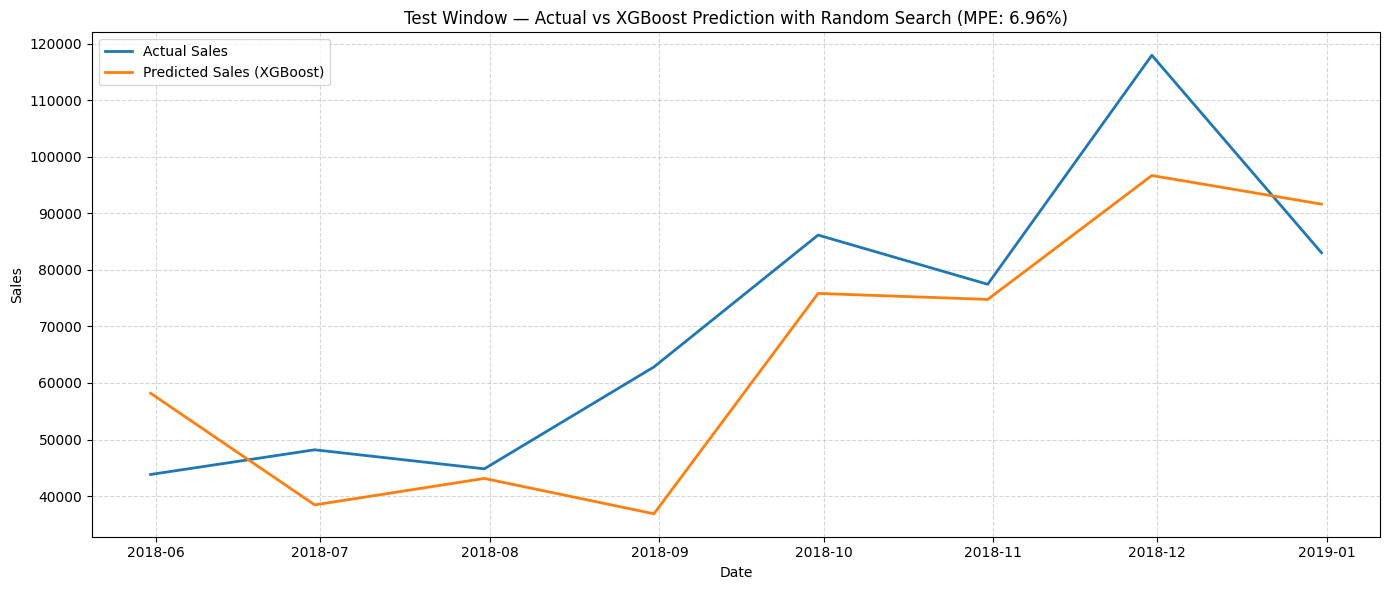

In [141]:
sales_daily_xgb = sales_daily_ppt.copy()
sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter

sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)

# sales_daily_xgb["roll_mean_3"] = sales_daily_xgb["y"].shift(1).rolling(3).mean()
# sales_daily_xgb["roll_mean_6"] = sales_daily_xgb["y"].shift(1).rolling(6).mean()
# sales_daily_xgb["roll_mean_12"] = sales_daily_xgb["y"].shift(1).rolling(12).mean()

# sales_daily_xgb["roll_std_12"] = sales_daily_xgb["y"].shift(1).rolling(12).std()
# sales_daily_xgb["roll_std_6"] = sales_daily_xgb["y"].shift(1).rolling(6).std()
sales_daily_xgb["roll_std_3"] = sales_daily_xgb["y"].shift(1).rolling(3).std()

# sales_daily_xgb["is_month_start"] = sales_daily_xgb["ds"].dt.is_month_start.astype(int)
# sales_daily_xgb["is_month_end"] = sales_daily_xgb["ds"].dt.is_month_end.astype(int)
# sales_daily_xgb["month_sin"] = np.sin(2 * np.pi * sales_daily_xgb["month"] / 12)
# sales_daily_xgb["month_cos"] = np.cos(2 * np.pi * sales_daily_xgb["month"] / 12)

# sales_daily_xgb["is_september"] = (sales_daily_xgb["month"] == 9).astype(int)
# sales_daily_xgb["is_novemeber"] = (sales_daily_xgb["month"] == 11).astype(int)
# sales_daily_xgb["is_december"] = (sales_daily_xgb["month"] == 12).astype(int)
# sales_daily_xgb["is_january"] = (sales_daily_xgb["month"] == 1).astype(int)

# uk_holidays = holidays.UnitedKingdom()
# sales_daily_xgb["is_holiday"] = sales_daily_xgb["ds"].dt.date.apply(
#     lambda x: 1 if x in uk_holidays else 0
# )


features = [
    "year",
    "month",
    "quarter",
    "lag_1", "lag_12",
    "lag_3", "lag_6",
    "lag_2",
    # "roll_mean_12",
    # "roll_mean_6",
    # "roll_mean_3",
    # "roll_std_12",
    # "roll_std_6",
    "roll_std_3",
    # "is_month_start",
    # "is_month_end",
    # "month_sin", "month_cos",
    # "is_september",
    # "is_novemeber",
    # "is_december",
    # "is_january",
    # "is_holiday"
]

sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

split = int(len(sales_daily_xgb) * 0.8)
train_xgb = sales_daily_xgb.iloc[:split]
test_xgb = sales_daily_xgb.iloc[split:]
# # keep same split point as Prophet
# train_xgb_raw = sales_daily_xgb.iloc[:split_point].copy()
# test_xgb_raw  = sales_daily_xgb.iloc[split_point:].copy()

# # now drop NaNs separately (so you don't shift the boundary)
# train_xgb = train_xgb_raw.dropna()
# test_xgb  = test_xgb_raw.dropna()

X_train = train_xgb[features]
y_train = train_xgb["log_y"]

X_test = test_xgb[features]
y_test = test_xgb["log_y"]

tscv = TimeSeriesSplit(n_splits=3) #This ensures training folds always occur before validation folds, avoiding leakage.

param_grid = {
    "n_estimators": [300, 600, 1000, 1500], #number of trees or attempts
    "learning_rate": [0.01, 0.03, 0.05, 0.1], #how much each tree is allowed to change the model
    "max_depth": [3, 4, 5, 6, 8], #max depth of each tree
    "min_child_weight": [1, 2, 5, 10], #min number of observation required in a leaf
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0], #fraction of rows to build each tree and add randomnesS?
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0], #fraction of features used per tree
    "gamma": [0, 0.01, 0.1, 0.5], #min loss reduction to create a split
    "reg_alpha": [0, 0.01, 0.1, 1], #L1 regularisation
    "reg_lambda": [0.1, 1, 5, 10] #L2 regularisation
}

# Narrow parametere search to match the width of the dataset
# param_grid = {
#     "n_estimators": [300, 600, 1000],
#     "learning_rate": [0.01, 0.03, 0.05],
#     "max_depth": [2, 3, 4],
#     "min_child_weight": [1, 3, 5],
#     "subsample": [0.7, 0.8, 0.9],
#     "colsample_bytree": [0.7, 0.8, 0.9]
# }

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best params:", search.best_params_)


# THIS IS WITH LOG TRANSFORMATION
log_pred = best_model.predict(X_test)
y_pred = np.expm1(log_pred)     # back-transform to original scale

# true values in original scale
y_true = test_xgb["y"].values
mask = y_true > 1e-6
mae_xgb = mean_absolute_error(y_true, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))
mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100


print(f"MAE : {mae_xgb:,.2f}")
print(f"RMSE: {rmse_xgb:,.2f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"MPE: {mpe_xgb:.2f}%")

plt.figure(figsize=(14,6))

plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

plt.title("Test Window — Actual vs XGBoost Prediction with Random Search (MPE: 6.96%)")
plt.xlabel("Date"); plt.ylabel("Sales"); plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout(); plt.show()

## this is an old XGB Code, dont delete yet##

In [78]:
# sales_daily_xgb = sales_daily_ppt.copy()
# sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"]) #log transformation

# sales_daily_xgb["year"] = sales_daily_xgb["ds"].dt.year
# sales_daily_xgb["month"] = sales_daily_xgb["ds"].dt.month
# # sales_daily_xgb["day"] = sales_daily_xgb["ds"].dt.day this is weekly avg
# # sales_daily_xgb["dayofweek"] = sales_daily_xgb["ds"].dt.dayofweek this is weekly avg
# # sales_daily_xgb["weekofyear"] = sales_daily_xgb["ds"].dt.isocalendar().week.astype(int) this is weekly avg
# # sales_daily_xgb["is_weekend"] = sales_daily_xgb["dayofweek"].isin([5, 6]).astype(int) this is weekly avg
# sales_daily_xgb["quarter"] = sales_daily_xgb["ds"].dt.quarter
# # sales_daily_xgb["is_month_start"] = sales_daily_xgb["ds"].dt.is_month_start.astype(int)
# # sales_daily_xgb["is_month_end"] = sales_daily_xgb["ds"].dt.is_month_end.astype(int)


# sales_daily_xgb["lag_1"] = sales_daily_xgb["y"].shift(1)
# sales_daily_xgb["lag_2"] = sales_daily_xgb["y"].shift(2)
# sales_daily_xgb["lag_3"] = sales_daily_xgb["y"].shift(3)
# sales_daily_xgb["lag_6"] = sales_daily_xgb["y"].shift(6)
# sales_daily_xgb["lag_12"] = sales_daily_xgb["y"].shift(12)
# #adding these to improve results with random search
# # sales_daily_xgb["lag_4"] = sales_daily_xgb["y"].shift(4)
# # sales_daily_xgb["lag_5"] = sales_daily_xgb["y"].shift(5)
# # sales_daily_xgb["lag_9"] = sales_daily_xgb["y"].shift(9)
# # sales_daily_xgb["lag_18"] = sales_daily_xgb["y"].shift(18)
# # sales_daily_xgb["lag_24"] = sales_daily_xgb["y"].shift(24)

# sales_daily_xgb["roll_mean_3"] = sales_daily_xgb["y"].shift(1).rolling(3).mean()
# sales_daily_xgb["roll_std_3"] = sales_daily_xgb["y"].shift(1).rolling(3).std()
# sales_daily_xgb["roll_mean_6"] = sales_daily_xgb["y"].shift(1).rolling(6).mean()
# sales_daily_xgb["roll_std_6"] = sales_daily_xgb["y"].shift(1).rolling(6).std()
# sales_daily_xgb["roll_mean_12"] = sales_daily_xgb["y"].shift(1).rolling(12).mean()
# # sales_daily_xgb["roll_std_12"] = sales_daily_xgb["y"].shift(1).rolling(12).std()
# # sales_daily_xgb["roll_min_3"] = sales_daily_xgb["y"].shift(1).rolling(3).min()
# # sales_daily_xgb["roll_max_3"] = sales_daily_xgb["y"].shift(1).rolling(3).max()

# # sales_daily_xgb["month_sin"] = np.sin(2 * np.pi * sales_daily_xgb["month"] / 12)
# # sales_daily_xgb["month_cos"] = np.cos(2 * np.pi * sales_daily_xgb["month"] / 12)
# sales_daily_xgb["is_black_friday"] = sales_daily_xgb["month"].isin([11]).astype(int)
# # sales_daily_xgb["is_september"] = (sales_daily_xgb["month"] == 9).astype(int)
# sales_daily_xgb["is_november"] = (sales_daily_xgb["month"] == 11).astype(int)
# sales_daily_xgb["is_december"] = (sales_daily_xgb["month"] == 12).astype(int)
# sales_daily_xgb["is_january"] = (sales_daily_xgb["month"] == 1).astype(int)

# uk_holidays = holidays.UnitedKingdom()
# sales_daily_xgb["is_holiday"] = sales_daily_xgb["ds"].dt.date.apply(
#     lambda x: 1 if x in uk_holidays else 0
# )

# sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)
# # sales_daily_xgb["log_y"] = np.log1p(sales_daily_xgb["y"])

# # sales_daily_xgb = sales_daily_xgb.dropna().reset_index(drop=True)

In [79]:
# features = [
#     "year","month",
#     "quarter",
#     "is_month_start","is_month_end",
#     # "month_sin","month_cos",
#     # "is_september",
#     "is_november",
#     "is_december", 
#     "is_january", 
#     "is_black_friday",
#     "is_holiday",
#     "lag_1","lag_2","lag_3","lag_6","lag_12",
#     "roll_mean_3","roll_mean_6","roll_mean_12", 
#     "roll_std_3","roll_std_6"
# ]
# #################
# ## 80/20 split ##
# #################
# split = int(len(sales_daily_xgb) * 0.8)
# train_xgb = sales_daily_xgb.iloc[:split]
# test_xgb = sales_daily_xgb.iloc[split:]

# ######################
# ## year-based split ##
# ######################
# # train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2016]
# # test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] >= 2017]
# # train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
# # test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]

# X_train = train_xgb[features]
# y_train = train_xgb["log_y"]

# X_test = test_xgb[features]
# y_test = test_xgb["log_y"]

# ##############################
# ## RANDOM SEARCH ##
# ##############################

# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=3) #This ensures training folds always occur before validation folds, avoiding leakage.


In [80]:
# ###############
# ## NOT TUNED ##
# ###############

# # model_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, 
# #                         max_depth=5,
# #                         subsample=0.8,
# #                         colsample_bytree=0.8,
# #                         random_state=42)
# # model_xgb.fit(X_train, y_train)

# #############################
# # RANDOM SEARCH ##
# #############################

# param_grid = {
#     "n_estimators": [300, 600, 1000, 1500],
#     "learning_rate": [0.01, 0.03, 0.05, 0.1],
#     "max_depth": [3, 4, 5, 6, 8],
#     "min_child_weight": [1, 2, 5, 10],
#     "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
#     "gamma": [0, 0.01, 0.1, 0.5],
#     "reg_alpha": [0, 0.01, 0.1, 1],
#     "reg_lambda": [0.1, 1, 5, 10]
# }
# ## too narrow for the search ##
# # param_grid = {
# #     "n_estimators": [400, 800, 1200],
# #     "learning_rate": [0.01, 0.03, 0.05],
# #     "max_depth": [3, 4, 5],
# #     "min_child_weight": [1, 3, 5],
# #     "subsample": [0.7, 0.9],
# #     "colsample_bytree": [0.7, 0.9],
# #     "gamma": [0, 0.1],
# #     "reg_alpha": [0, 0.1],
# #     "reg_lambda": [1, 5]
# # }

# xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=30,
#     scoring="neg_mean_absolute_error",
#     cv=tscv,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# search.fit(X_train, y_train)

# best_model = search.best_estimator_
# print("Best params:", search.best_params_)

# ############################################
# # Bayesian Tree Parzen Estimators TPE ##
# ############################################
# # def objective(trial):
# #     # Suggest hyperparameters
# #     params = {
# #         "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
# #         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
# #         "max_depth": trial.suggest_int("max_depth", 3, 8),
# #         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
# #         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
# #         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
# #         "gamma": trial.suggest_float("gamma", 0.0, 0.5),
# #         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
# #         "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
# #         "random_state": 42,
# #         "objective": "reg:squarederror"
# #     }

# #     model_xgb = XGBRegressor(**params)

# #     # Single hold-out validation split
# #     split = int(len(X_train) * 0.8)
# #     X_tr, X_val = X_train.iloc[:split], X_train.iloc[split:]
# #     y_tr, y_val = y_train.iloc[:split], y_train.iloc[split:]

# #     y_tr = y_tr.values.ravel()
# #     y_val = y_val.values.ravel()
    
# #     model_xgb.fit(X_tr, y_tr)

# #     preds_xgb = model_xgb.predict(X_val)
# #     preds_xgb = np.array(preds_xgb).ravel()   # ensure 1D

# #     mae_xgb = mean_absolute_error(y_val, preds_xgb)
# #     return float(mae_xgb)



In [81]:
# ###############
# ## NOT TUNED ##
# ###############
# # y_pred = model_xgb.predict(X_test)

# # mae_xgb = mean_absolute_error(y_test, y_pred)
# # rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
# # mask = y_test != 0

# # # Apply the mask to both y_test and y_pred
# # actuals = y_test[mask]
# # predictions = y_pred[mask]

# # # Recalculate MAPE safely
# # mape_xgb = np.mean(np.abs((actuals - predictions) / actuals)) * 100

# # print(f"MAE : {mae_xgb:,.2f}")
# # print(f"RMSE: {rmse_xgb:,.2f}")
# # print(f"MAPE: {mape_xgb:.2f}%")

# ##############################
# ## LOG TRANSFORMATION ##
# ##############################

# # # THIS IS WITH LOG TRANSOFRMATION
# # log_pred = model_xgb.predict(X_test)
# # y_pred = np.expm1(log_pred)  
# # y_true = np.expm1(y_test)

# # mae_xgb = mean_absolute_error(y_true, y_pred)
# # rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))

# # # mask = y_test != 0
# # # actuals = y_test[mask]
# # # predictions = y_pred[mask]
# # mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# # mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100
# # print(f"MAE: {mae_xgb:,.2f}")
# # print(f"RMSE: {rmse_xgb:,.2f}")
# # print(f"MAPE: {mape_xgb:.2f}%")
# # print(f"MPE: {mpe_xgb:.2f}%")

# ##############################
# ## RANDOM SEARCH ##
# ##############################


# # THIS IS WITH LOG TRANSFORMATION
# log_pred = best_model.predict(X_test)
# y_pred = np.expm1(log_pred)     # back-transform to original scale

# # true values in original scale
# y_true = test_xgb["y"]

# mae_xgb = mean_absolute_error(y_true, y_pred)
# rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred))
# mape_xgb = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe_xgb = np.mean((y_true - y_pred) / y_true) * 100


# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

# #############################################
# ## Bayesian Tree Parzen Estimators TPE ##
# #############################################
# # study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
# # study.optimize(objective, n_trials=50)   # increase to 50–100 if you have time

# # print("Best trial:", study.best_trial.number)
# # print("Best value (MAE):", study.best_trial.value)
# # print("Best params:", study.best_trial.params)

# # best_params = study.best_trial.params
# # best_params["objective"] = "reg:squarederror"
# # best_params["random_state"] = 42

# # best_xgb_tpe = XGBRegressor(**best_params)
# # best_xgb_tpe.fit(X_train, y_train)

# # # y_pred = best_xgb_tpe.predict(X_test)

# # pred_log_xgb = best_xgb_tpe.predict(X_test)
# # pred_xgb = np.expm1(pred_log_xgb)       # back-transform
# # actual_xgb = np.expm1(y_test)


In [82]:

#############################################
## Bayesian Tree Parzen Estimators TPE ##
#############################################

# mae_xgb = mean_absolute_error(actual_xgb, pred_xgb)
# rmse_xgb = np.sqrt(mean_squared_error(actual_xgb, pred_xgb))
# mape_xgb = np.mean(np.abs((actual_xgb - pred_xgb) / actual_xgb)) * 100
# mpe_xgb = np.mean((actual_xgb - pred_xgb) / actual_xgb) * 100

# print(f"MAE : {mae_xgb:,.2f}")
# print(f"RMSE: {rmse_xgb:,.2f}")
# print(f"MAPE: {mape_xgb:.2f}%")
# print(f"MPE: {mpe_xgb:.2f}%")

In [83]:
# plt.figure(figsize=(14,6))

# plt.plot(test_xgb["ds"], y_true, label="Actual Sales", linewidth=2)
# plt.plot(test_xgb["ds"], y_pred, label="Predicted Sales (XGBoost)", linewidth=2)

# plt.title("Actual vs Predicted Monthly Sales", fontsize=16)
# plt.xlabel("Date", fontsize=14)
# plt.ylabel("Sales", fontsize=14)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()

# #############################################
# ## Bayesian Tree Parzen Estimators TPE ##
# #############################################

# # plt.figure(figsize=(12,5))
# # plt.plot(test_xgb["ds"], actual_xgb, label="Actual", marker="o")
# # plt.plot(test_xgb["ds"], pred_xgb, label="Predicted", marker="o")
# # plt.title("Monthly Sales Forecast (XGBoost - Tuned with TPE)")
# # plt.xlabel("Date")
# # plt.ylabel("Sales")
# # plt.legend()
# # plt.tight_layout()
# # plt.show()

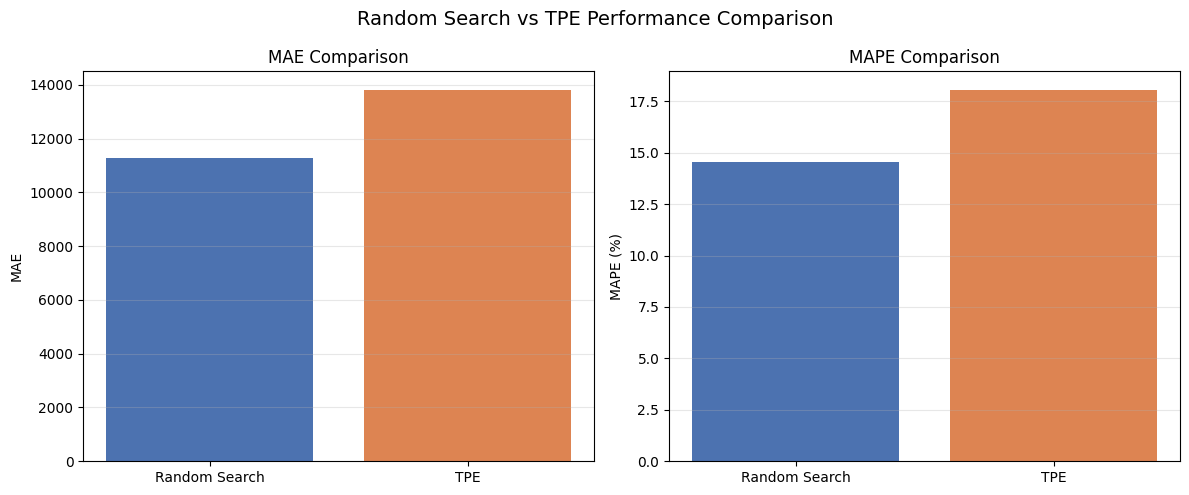

In [84]:
## PLOTTING DIFFERENT HPO METHOD'S RESULTS ##

methods = ["Random Search", "TPE"]

mae = [11272.42, 13807.54]
mape = [14.53, 18.05]

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- MAE subplot ---
axes[0].bar(methods, mae, color=["#4C72B0", "#DD8452"])
axes[0].set_title("MAE Comparison")
axes[0].set_ylabel("MAE")
axes[0].grid(axis="y", alpha=0.3)

# --- MAPE subplot ---
axes[1].bar(methods, mape, color=["#4C72B0", "#DD8452"])
axes[1].set_title("MAPE Comparison")
axes[1].set_ylabel("MAPE (%)")
axes[1].grid(axis="y", alpha=0.3)

plt.suptitle("Random Search vs TPE Performance Comparison", fontsize=14)
plt.tight_layout()
plt.show()


In [85]:
retail_data.head(), retail_data.describe()

(   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
 0    7981  CA-2015-103800 2015-01-03 2015-01-07  Standard Class    DP-13000   
 1     742  CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
 2     741  CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
 3     740  CA-2015-112326 2015-01-04 2015-01-08  Standard Class    PO-19195   
 4    1760  CA-2015-141817 2015-01-05 2015-01-12  Standard Class    MB-18085   
 
    Customer Name      Segment        Country          City  ... Day_of_year  \
 0  Darren Powers     Consumer  United States       Houston  ...           3   
 1  Phillina Ober  Home Office  United States    Naperville  ...           4   
 2  Phillina Ober  Home Office  United States    Naperville  ...           4   
 3  Phillina Ober  Home Office  United States    Naperville  ...           4   
 4     Mick Brown     Consumer  United States  Philadelphia  ...           5   
 
    Day_of_week Weekday_name Week_of

In [86]:
retail_data['Sales'].value_counts(normalize=True)

Sales
12.960     0.005612
19.440     0.003980
15.552     0.003980
10.368     0.003571
25.920     0.003469
             ...   
123.858    0.000102
418.320    0.000102
146.136    0.000102
223.888    0.000102
3.024      0.000102
Name: proportion, Length: 5757, dtype: float64

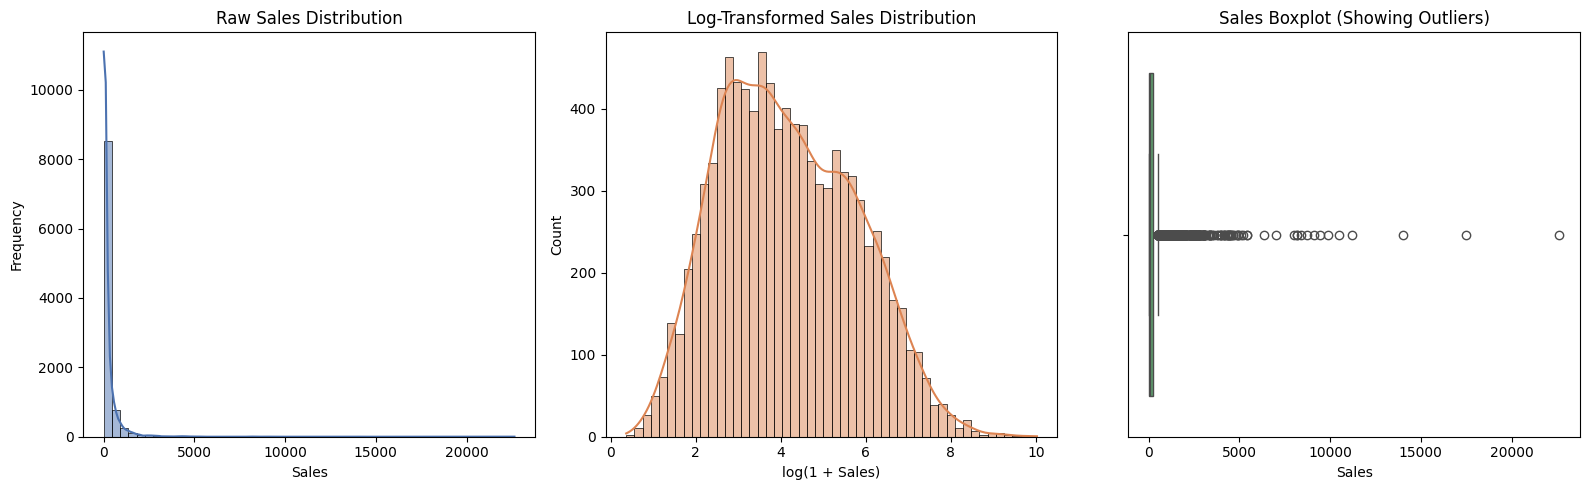

In [87]:
import numpy as np

plt.figure(figsize=(16,5))

# --- 1. Raw Sales Histogram ---
plt.subplot(1, 3, 1)
sns.histplot(retail_data["Sales"], bins=50, kde=True, color="#4C72B0")
plt.title("Raw Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")

# --- 2. Log-transformed Sales Histogram ---
plt.subplot(1, 3, 2)
sns.histplot(np.log1p(retail_data["Sales"]), bins=50, kde=True, color="#DD8452")
plt.title("Log-Transformed Sales Distribution")
plt.xlabel("log(1 + Sales)")

# --- 3. Boxplot ---
plt.subplot(1, 3, 3)
sns.boxplot(x=retail_data["Sales"], color="#55A868")
plt.title("Sales Boxplot (Showing Outliers)")
plt.xlabel("Sales")

plt.tight_layout()
plt.show()


## cross-validation??
how many folds

## HYBRID MODEL!! LESSS GOOOOO

### Baseline ###

11:14:46 - cmdstanpy - INFO - Chain [1] start processing
11:14:46 - cmdstanpy - INFO - Chain [1] done processing


=== Prophet + XGB (Residual Hybrid) ===
MAE : 11,512.98
RMSE: 13,638.07
MAPE: 17.36%
MPE : 6.81%


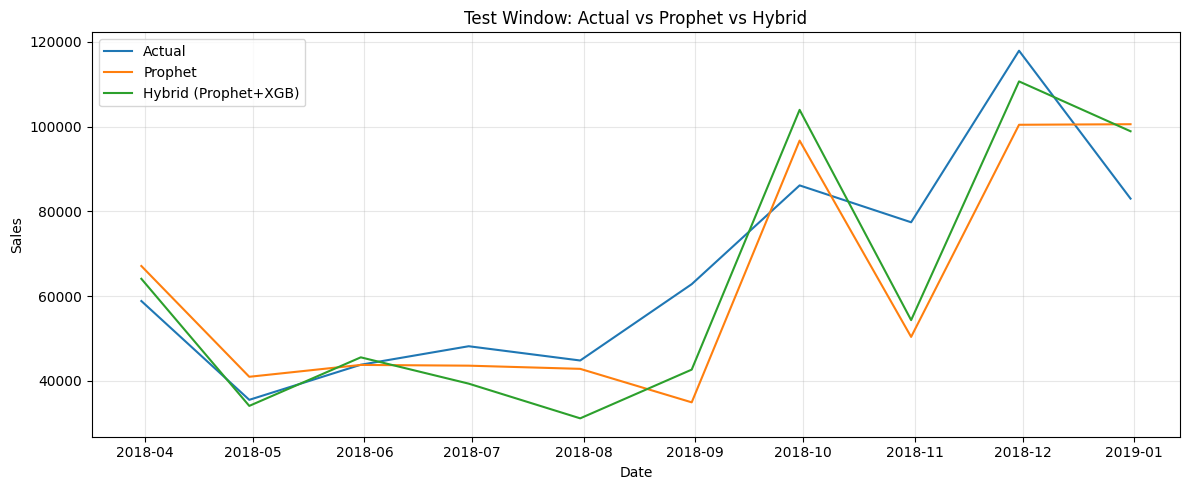

In [88]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

split = int(len(sales_daily_ppt) * 0.8)
train_df = sales_daily_ppt.iloc[:split].copy()
test_df  = sales_daily_ppt.iloc[split:].copy()


hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.fit(train_df[["ds","y"]])

all_dates = pd.concat([train_df[["ds"]], test_df[["ds"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left")
test_df  = test_df.merge(fcst_all, on="ds", how="left")

train_df["resid"] = train_df["y"] - train_df["yhat_p"]

lags = (1,2,3,6,12)

def add_resid_lags(df, col="resid", lags=lags):
    df = df.copy()
    for L in lags:
        df[f"{col}_lag{L}"] = df[col].shift(L)
    return df


train_feat = add_resid_lags(train_df, "resid", lags=lags).dropna().copy()

resid_features = [f"resid_lag{L}" for L in lags] + ["yhat_p"]  # include prophet baseline as a regressor
X_train = train_feat[resid_features]
y_train = train_feat["resid"]

xgb_res = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)
xgb_res.fit(X_train, y_train)

test_df = test_df.copy()
test_df["resid_pred"] = np.nan

# history of residuals we are allowed to use = training residuals
resid_history = train_df["resid"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    feat = {"yhat_p": row["yhat_p"]}
    for L in lags:
        feat[f"resid_lag{L}"] = resid_history[-L]  # last L residuals (predicted as we go)

    X_one = pd.DataFrame([feat])[resid_features]
    r_hat = xgb_res.predict(X_one)[0]

    test_df.loc[test_df.index[i], "resid_pred"] = r_hat
    resid_history.append(r_hat) 

    test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Prophet + XGB (Residual Hybrid) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")



plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")

plt.title("Test Window: Actual vs Prophet vs Hybrid")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Hybrid (Prophet Feature Engineering) ###

11:14:47 - cmdstanpy - INFO - Chain [1] start processing
11:14:47 - cmdstanpy - INFO - Chain [1] done processing


=== Prophet + XGB (Residual Hybrid) ===
MAE : 9,866.56
RMSE: 11,979.08
MAPE: 14.86%
MPE : 1.65%


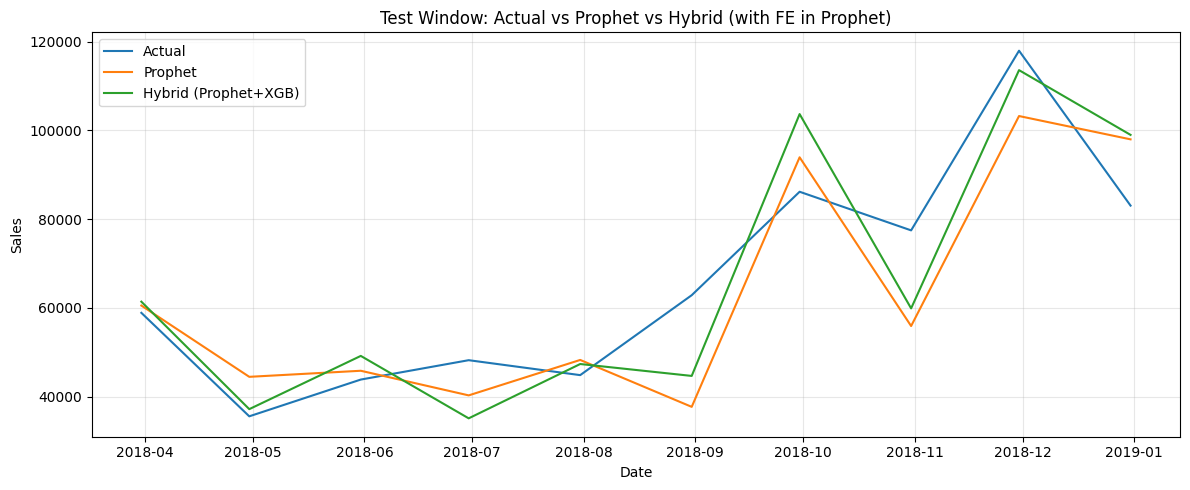

In [89]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

split = int(len(sales_daily_ppt) * 0.8)
train_df = sales_daily_ppt.iloc[:split].copy()
test_df  = sales_daily_ppt.iloc[split:].copy()


hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

hybrid_model.add_regressor("is_september",mode="multiplicative")
hybrid_model.add_regressor("is_november",mode="multiplicative")
hybrid_model.add_regressor("is_december",mode="multiplicative")
hybrid_model.add_regressor("is_january",mode="additive")

hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
                       test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left")
test_df  = test_df.merge(fcst_all, on="ds", how="left")

train_df["resid"] = train_df["y"] - train_df["yhat_p"]

lags = (1,2,3,6,12)
def add_resid_lags(df, col="resid", lags=lags):
    df = df.copy()
    for L in lags:
        df[f"{col}_lag{L}"] = df[col].shift(L)
    return df

train_feat = add_resid_lags(train_df, "resid", lags=lags).dropna().copy()

resid_features = [f"resid_lag{L}" for L in lags] + ["yhat_p"]  # include prophet baseline as a regressor
X_train = train_feat[resid_features]
y_train = train_feat["resid"]

xgb_res = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)
xgb_res.fit(X_train, y_train)

test_df = test_df.copy()
test_df["resid_pred"] = np.nan

# history of residuals we are allowed to use = training residuals
resid_history = train_df["resid"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    feat = {"yhat_p": row["yhat_p"]}
    for L in lags:
        feat[f"resid_lag{L}"] = resid_history[-L]  # last L residuals (predicted as we go)

    X_one = pd.DataFrame([feat])[resid_features]
    r_hat = xgb_res.predict(X_one)[0]

    test_df.loc[test_df.index[i], "resid_pred"] = r_hat
    resid_history.append(r_hat) 

test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Prophet + XGB (Residual Hybrid) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")



plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")

plt.title("Test Window: Actual vs Prophet vs Hybrid (with FE in Prophet)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Hybrid (Prophet + XGB Feature Engineering) ###

11:14:48 - cmdstanpy - INFO - Chain [1] start processing
11:14:49 - cmdstanpy - INFO - Chain [1] done processing


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGB params: {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0.01, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
=== Prophet + XGB (Residual Hybrid) ===
MAE : 9,863.65
RMSE: 11,959.81
MAPE: 14.74%
MPE : 1.98%


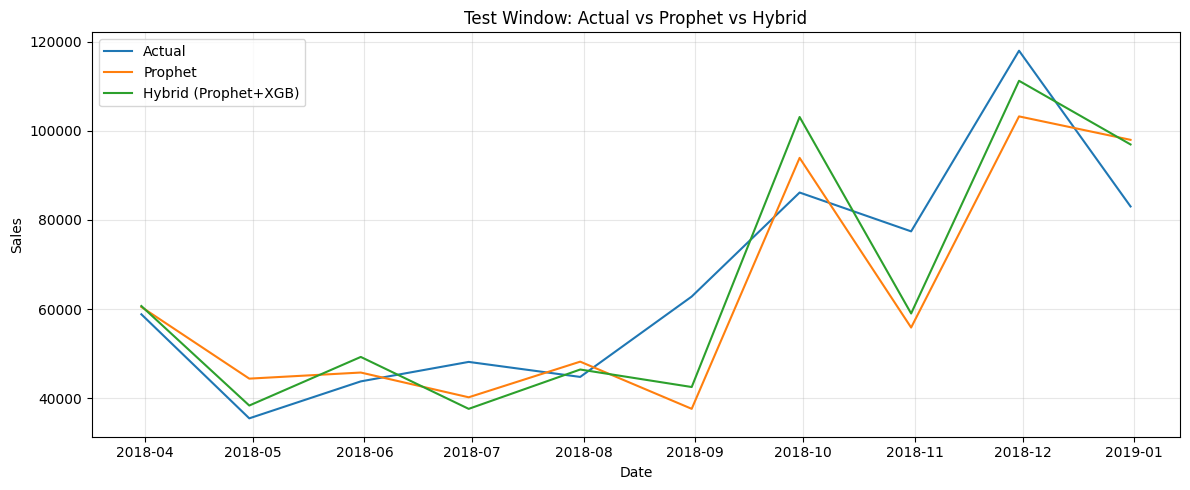

In [90]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

split = int(len(sales_daily_ppt) * 0.8)
train_df = sales_daily_ppt.iloc[:split].copy()
test_df  = sales_daily_ppt.iloc[split:].copy()


hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

hybrid_model.add_regressor("is_september",mode="multiplicative")
hybrid_model.add_regressor("is_november",mode="multiplicative")
hybrid_model.add_regressor("is_december",mode="multiplicative")
hybrid_model.add_regressor("is_january",mode="additive")

hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
                       test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left") #mergeing actual and forecasted to feed to XGB
test_df  = test_df.merge(fcst_all, on="ds", how="left")

train_df["resid"] = train_df["y"] - train_df["yhat_p"]


## XGB RESD TRAINING ##
lags = (1, 2, 3, 6, 12)
def add_resid_features(df):
    df = df.copy()

    # residual lags
    for L in lags:
        df[f"resid_lag{L}"] = df["resid"].shift(L)
    # rolling stats on residuals
    # df["resid_roll_mean_3"] = df["resid"].shift(1).rolling(3).mean()
    df["resid_roll_std_3"]  = df["resid"].shift(1).rolling(3).std()

    # df["resid_roll_mean_6"] = df["resid"].shift(1).rolling(6).mean()
    # df["resid_roll_std_6"]  = df["resid"].shift(1).rolling(6).std()

    # df["resid_roll_mean_12"] = df["resid"].shift(1).rolling(12).mean()

    # calendar context (XGB only)
    df["year"] = df["ds"].dt.year
    df["month"] = df["ds"].dt.month
    df["quarter"] = df["ds"].dt.quarter

    # cyclic encoding (optional but good)
    # df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
    # df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

    return df

train_feat = add_resid_features(train_df).dropna().copy()

resid_features = [
    "resid_lag1","resid_lag2","resid_lag3","resid_lag6","resid_lag12",
    # "resid_roll_mean_3",
    "resid_roll_std_3",
    # "resid_roll_mean_6","resid_roll_std_6",
    # "resid_roll_mean_12",
    "year",
    "month","quarter",
    # "month_sin","month_cos",
    "yhat_p"  # Prophet baseline as anchor
]

X_train = train_feat[resid_features]
y_train = train_feat["resid"]

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [2, 3, 4],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "reg_alpha": [0, 0.01, 0.1, 1], #L1 regularisation
    "reg_lambda": [0.1, 1, 5, 10] #L2 regularisation
}


tscv = TimeSeriesSplit(n_splits=3)

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

rand_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,              # small, safe
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

best_xgb = rand_search.best_estimator_

print("Best XGB params:", rand_search.best_params_)


test_df = test_df.copy()
test_df["resid_pred"] = np.nan

# history of residuals we are allowed to use = training residuals
resid_history = train_df["resid"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    # --- base features ---
    feat = {
        "yhat_p": row["yhat_p"],
        "year": row["ds"].year,
        # calendar context (XGB only)
        "month": row["ds"].month,
        "quarter": row["ds"].quarter,
        "resid_roll_std_3": np.std(resid_history[-3:], ddof=1) if len(resid_history) >= 3 else 0.0
        # "month_sin": np.sin(2 * np.pi * row["ds"].month / 12),
        # "month_cos": np.cos(2 * np.pi * row["ds"].month / 12),
    }

    # --- residual lags ---
    
    for L in lags:
        feat[f"resid_lag{L}"] = resid_history[-L]

    # --- rolling features from residual history ---
    # feat["resid_roll_mean_3"] = np.mean(resid_history[-3:])
    # feat["resid_roll_std_3"]  = np.std(resid_history[-3:])

    # feat["resid_roll_mean_6"] = np.mean(resid_history[-6:])
    # feat["resid_roll_std_6"]  = np.std(resid_history[-6:])

    # feat["resid_roll_mean_12"] = np.mean(resid_history[-12:])

    # build dataframe in correct column order
    X_one = pd.DataFrame([feat])[resid_features]

    # predict residual
    r_hat = best_xgb.predict(X_one)[0]

    # store + roll forward
    test_df.loc[test_df.index[i], "resid_pred"] = r_hat
    resid_history.append(r_hat)

test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Prophet + XGB (Residual Hybrid) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")
plt.title("Test Window: Actual vs Prophet vs Hybrid")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Residual evaluation ##

In [91]:
resid_true = test_df["resid_true"].values
resid_pred = test_df["resid_pred"].values

mae_resid  = mean_absolute_error(resid_true, resid_pred)
rmse_resid = np.sqrt(mean_squared_error(resid_true, resid_pred))
eps = 1e-6
mask = np.abs(resid_true) > eps

mape_resid = np.mean(
    np.abs((resid_true[mask] - resid_pred[mask]) / resid_true[mask])
) * 100

mpe_resid = np.mean(
    (resid_true[mask] - resid_pred[mask]) / resid_true[mask]
) * 100
corr = np.corrcoef(resid_true, resid_pred)[0, 1]

directional_acc = np.mean(
    np.sign(resid_true) == np.sign(resid_pred)
)

print(f"Directional accuracy: {directional_acc:.2%}")
print(f"Residual correlation: {corr:.3f}")

print(f"Residual MAPE: {mape_resid:.2f}%")
print(f"Residual MPE : {mpe_resid:.2f}%")

print(f"Residual MAE : {mae_resid:,.2f}")
print(f"Residual RMSE: {rmse_resid:,.2f}")

KeyError: 'resid_true'

## Subsequent residual vs  predicted graph ##

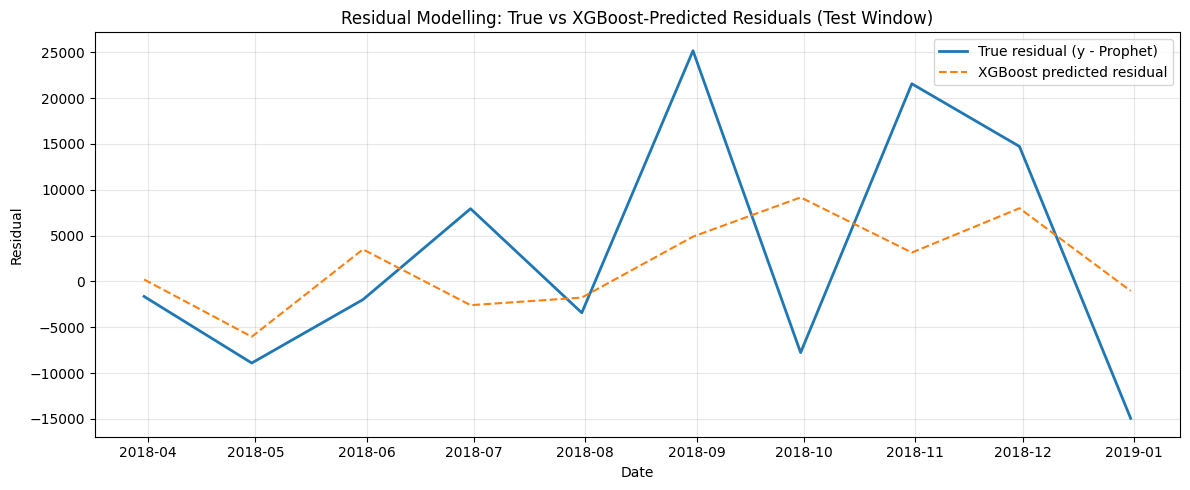

In [ ]:
test_df["resid_true"] = test_df["y"] - test_df["yhat_p"]

plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["resid_true"], label="True residual (y - Prophet)", linewidth=2)
plt.plot(test_df["ds"], test_df["resid_pred"], label="XGBoost predicted residual", linestyle="--")

plt.title("Residual Modelling: True vs XGBoost-Predicted Residuals (Test Window)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## hybrid with TPE in XGB

In [ ]:
# sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

# sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
# sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
# sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
# sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
# sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
# sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

# split = int(len(sales_daily_ppt) * 0.8)
# train_df = sales_daily_ppt.iloc[:split].copy()
# test_df  = sales_daily_ppt.iloc[split:].copy()


# hybrid_model = Prophet(
#     yearly_seasonality=True,
#     weekly_seasonality=False,
#     daily_seasonality=False,
#     seasonality_mode="multiplicative",
#     changepoint_prior_scale=0.09
# )
# hybrid_model.add_seasonality(
#     name="quarterly",
#     period=91.25, #365.25/4
#     fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
# )

# hybrid_model.add_regressor("is_september",mode="multiplicative")
# hybrid_model.add_regressor("is_november",mode="multiplicative")
# hybrid_model.add_regressor("is_december",mode="multiplicative")
# hybrid_model.add_regressor("is_january",mode="additive")

# hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

# all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
#                        test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
# fcst_all = hybrid_model.predict(all_dates)


# fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
# train_df = train_df.merge(fcst_all, on="ds", how="left")
# test_df  = test_df.merge(fcst_all, on="ds", how="left")

# train_df["resid"] = train_df["y"] - train_df["yhat_p"]


# ## XGB RESD TRAINING ##
# lags = (1, 3, 6, 12)
# def add_resid_features(df):
#     df = df.copy()

#     # residual lags
#     for L in lags:
#         df[f"resid_lag{L}"] = df["resid"].shift(L)

#     # rolling stats on residuals
#     # df["resid_roll_mean_3"] = df["resid"].shift(1).rolling(3).mean()
#     # df["resid_roll_std_3"]  = df["resid"].shift(1).rolling(3).std()

#     # df["resid_roll_mean_6"] = df["resid"].shift(1).rolling(6).mean()
#     df["resid_roll_std_6"]  = df["resid"].shift(1).rolling(6).std()

#     df["resid_roll_mean_12"] = df["resid"].shift(1).rolling(12).mean()

#     # calendar context (XGB only)
#     df["year"] = df["ds"].dt.year
#     df["month"] = df["ds"].dt.month
#     df["quarter"] = df["ds"].dt.quarter
#     df["is_month_start"] = df["ds"].dt.is_month_start.astype(int)
#     df["is_month_end"] = df["ds"].dt.is_month_end.astype(int)

#     # cyclic encoding (optional but good)
#     # df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
#     # df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

#     return df

# train_feat = add_resid_features(train_df).dropna().copy()

# resid_features = [
#     "resid_lag1","resid_lag3","resid_lag6","resid_lag12",
#     # "resid_roll_mean_3",
#     # "resid_roll_std_3",
#     # "resid_roll_mean_6",
#     "resid_roll_std_6",
#     "resid_roll_mean_12",
#     "year",
#     "month","quarter",
#     "is_month_start", "is_month_end",
#     # "month_sin","month_cos",
#     "yhat_p"  # Prophet baseline as anchor
# ]

# X_train = train_feat[resid_features]
# y_train = train_feat["resid"]

# def objective(trial):
#     param_dist = {
#         "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 8),
#         "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.0, 0.5),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
#         "random_state": 42,
#         "objective": "reg:squarederror",
#         "n_jobs": -1

#     }
#     model = XGBRegressor(**param_dist)

#     maes = []
#     for tr_idx, val_idx in tscv.split(X_train):
#         X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

#         model.fit(X_tr, y_tr)
#         preds = model.predict(X_val)
#         maes.append(mean_absolute_error(y_val, preds))

#     return float(np.mean(maes))

# study = optuna.create_study(
#     direction="minimize",
#     sampler=optuna.samplers.TPESampler(seed=42)
# )
# study.optimize(objective, n_trials=50)

# print("Best trial:", study.best_trial.number)
# print("Best CV MAE:", study.best_trial.value)
# print("Best params:", study.best_trial.params)

# best_params = study.best_trial.params
# best_params.update({
#     "random_state": 42,
#     "objective": "reg:squarederror",
#     "n_jobs": -1
# })

# best_xgb = XGBRegressor(**best_params)
# best_xgb.fit(X_train, y_train)



# test_df = test_df.copy()
# test_df["resid_pred"] = np.nan

# # history of residuals we are allowed to use = training residuals
# resid_history = train_df["resid"].tolist()

# for i in range(len(test_df)):
#     row = test_df.iloc[i]

#     # --- base features ---
#     feat = {
#         "yhat_p": row["yhat_p"],
#         "year": row["ds"].year,
#         # calendar context (XGB only)
#         "month": row["ds"].month,
#         "quarter": row["ds"].quarter,
#         "is_month_start": row["ds"].is_month_start,
#         "is_month_end": row["ds"].is_month_end,
#         "resid_roll_std_6": np.std(resid_history[-6:], ddof=1) if len(resid_history) >= 6 else 0.0, 
#         "resid_roll_mean_12": np.mean(resid_history[-12:]) if len(resid_history) >= 12 else 0.0
#         # "resid_roll_std_3": np.std(resid_history[-3:], ddof=1) if len(resid_history) >= 3 else 0.0
#         # "month_sin": np.sin(2 * np.pi * row["ds"].month / 12),
#         # "month_cos": np.cos(2 * np.pi * row["ds"].month / 12),
#     }

#     # --- residual lags ---
    
#     for L in lags:
#         feat[f"resid_lag{L}"] = resid_history[-L]

#     # --- rolling features from residual history ---
#     # feat["resid_roll_mean_3"] = np.mean(resid_history[-3:])
#     # feat["resid_roll_std_3"]  = np.std(resid_history[-3:])

#     # feat["resid_roll_mean_6"] = np.mean(resid_history[-6:])
#     # feat["resid_roll_std_6"]  = np.std(resid_history[-6:])

#     # feat["resid_roll_mean_12"] = np.mean(resid_history[-12:])

#     # build dataframe in correct column order
#     X_one = pd.DataFrame([feat])[resid_features]

#     # predict residual
#     r_hat = best_xgb.predict(X_one)[0]

#     # store + roll forward
#     test_df.loc[test_df.index[i], "resid_pred"] = r_hat
#     resid_history.append(r_hat)

# test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

# y_true = test_df["y"].values
# y_pred = test_df["yhat_hybrid"].values

# mae  = mean_absolute_error(y_true, y_pred)
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# mpe  = np.mean((y_true - y_pred) / y_true) * 100

# print("=== Prophet + XGB (Residual Hybrid) ===")
# print(f"MAE : {mae:,.2f}")
# print(f"RMSE: {rmse:,.2f}")
# print(f"MAPE: {mape:.2f}%")
# print(f"MPE : {mpe:.2f}%")

# plt.figure(figsize=(12,5))
# plt.plot(test_df["ds"], test_df["y"], label="Actual")
# plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
# plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")
# plt.title("Test Window: Actual vs Prophet vs Hybrid (with FE in Prophet)")
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

hybrid_tpe_try_2

20:06:10 - cmdstanpy - INFO - Chain [1] start processing
20:06:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2026-01-13 20:06:10,282] A new study created in memory with name: no-name-d05f4edf-5405-4097-a010-8a4c6e6d6412
[I 2026-01-13 20:06:11,211] Trial 0 finished with value: 6589.1028589973575 and parameters: {'n_estimators': 749, 'learning_rate': 0.08927180304353628, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.6624074561769746, 'colsample_bytree': 0.662397808134481, 'gamma': 0.02904180608409973, 'reg_alpha': 0.8661761457749352, 'reg_lambda': 6.051038616257768}. Best is trial 0 with value: 6589.1028589973575.
[I 2026-01-13 20:06:12,386] Trial 1 finished with value: 6088.252689066802 and parameters: {'n_estimators': 1150, 'learning_rate': 0.010485387725194618, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.6849356442713105, 'colsample_bytree': 0.6727299868828402, 'gamma': 0.09170225492671691, 'reg_alpha': 0.3042422429595377, 'reg_lambda': 5.295088673159155}. Bes

Best trial: 111
Best CV MAE: 5293.780088793753
Best params: {'n_estimators': 1252, 'learning_rate': 0.053587930535432406, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.8564307638168441, 'colsample_bytree': 0.6529443467363046, 'gamma': 0.1060985095202398, 'reg_alpha': 0.8091151070422214, 'reg_lambda': 0.5157737993988444}
=== Prophet + XGB (Residual Hybrid) ===
MAE : 10,395.72
RMSE: 12,515.51
MAPE: 15.84%
MPE : 2.40%


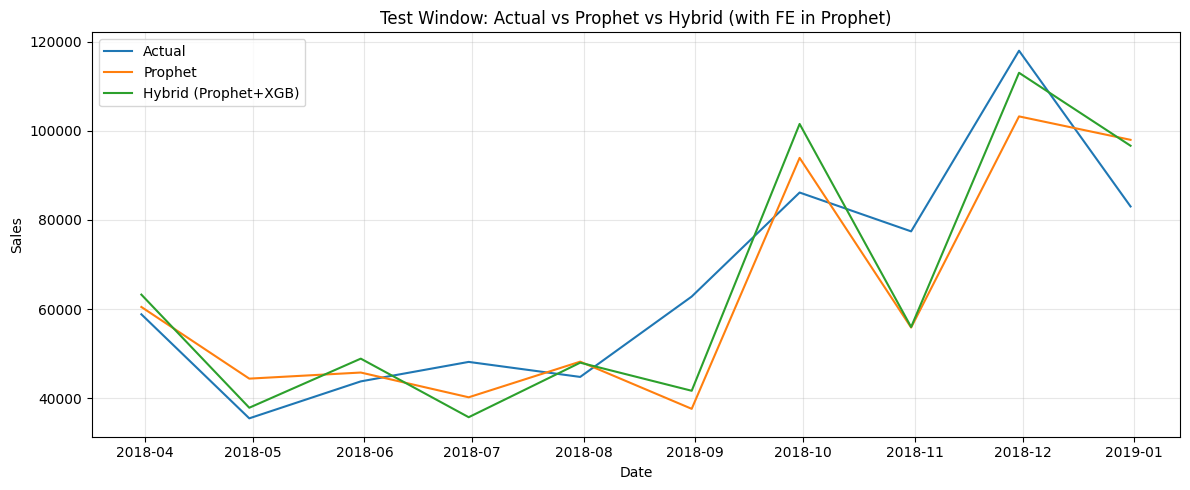

In [ ]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

split = int(len(sales_daily_ppt) * 0.8)
train_df = sales_daily_ppt.iloc[:split].copy()
test_df  = sales_daily_ppt.iloc[split:].copy()


hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

hybrid_model.add_regressor("is_september",mode="multiplicative")
hybrid_model.add_regressor("is_november",mode="multiplicative")
hybrid_model.add_regressor("is_december",mode="multiplicative")
hybrid_model.add_regressor("is_january",mode="additive")

hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
                       test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left")
test_df  = test_df.merge(fcst_all, on="ds", how="left")

train_df["resid"] = train_df["y"] - train_df["yhat_p"]


## XGB RESD TRAINING ##
lags = (1, 3, 6, 12)
def add_resid_features(df):
    df = df.copy()

    # residual lags
    for L in lags:
        df[f"resid_lag{L}"] = df["resid"].shift(L)

    # rolling stats on residuals
    # df["resid_roll_mean_3"] = df["resid"].shift(1).rolling(3).mean()
    # df["resid_roll_std_3"]  = df["resid"].shift(1).rolling(3).std()

    # df["resid_roll_mean_6"] = df["resid"].shift(1).rolling(6).mean()
    df["resid_roll_std_6"]  = df["resid"].shift(1).rolling(6).std()

    df["resid_roll_mean_12"] = df["resid"].shift(1).rolling(12).mean()

    # calendar context (XGB only)
    df["year"] = df["ds"].dt.year
    df["month"] = df["ds"].dt.month
    df["quarter"] = df["ds"].dt.quarter
    df["is_month_start"] = df["ds"].dt.is_month_start.astype(int)
    df["is_month_end"] = df["ds"].dt.is_month_end.astype(int)

    # cyclic encoding (optional but good)
    # df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
    # df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

    return df

train_feat = add_resid_features(train_df).dropna().copy()

resid_features = [
    "resid_lag1","resid_lag3","resid_lag6","resid_lag12",
    # "resid_roll_mean_3",
    # "resid_roll_std_3",
    # "resid_roll_mean_6",
    "resid_roll_std_6",
    "resid_roll_mean_12",
    "year",
    "month","quarter",
    "is_month_start", "is_month_end",
    # "month_sin","month_cos",
    "yhat_p"  # Prophet baseline as anchor
]

X_train = train_feat[resid_features]
y_train = train_feat["resid"]

def objective(trial):
    param_dist = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 0.5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0),
        "random_state": 42,
        "objective": "reg:squarederror",
        "n_jobs": -1

    }
    model = XGBRegressor(**param_dist)

    maes = []
    for tr_idx, val_idx in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        maes.append(mean_absolute_error(y_val, preds))
        # mpes  = np.mean((y_val - preds) / y_val) * 100

    return float(np.mean(maes)) # + (abs(np.mean(mpes)) * 0.1)

study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=150)

print("Best trial:", study.best_trial.number)
print("Best CV MAE:", study.best_trial.value)
print("Best params:", study.best_trial.params)

best_params = study.best_trial.params
best_params.update({
    "random_state": 42,
    "objective": "reg:squarederror",
    "n_jobs": -1
})

best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)



test_df = test_df.copy()
test_df["resid_pred"] = np.nan

# history of residuals we are allowed to use = training residuals
resid_history = train_df["resid"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    # --- base features ---
    feat = {
        "yhat_p": row["yhat_p"],
        "year": row["ds"].year,
        # calendar context (XGB only)
        "month": row["ds"].month,
        "quarter": row["ds"].quarter,
        "is_month_start": row["ds"].is_month_start,
        "is_month_end": row["ds"].is_month_end,
        "resid_roll_std_6": np.std(resid_history[-6:], ddof=1) if len(resid_history) >= 6 else 0.0, 
        "resid_roll_mean_12": np.mean(resid_history[-12:]) if len(resid_history) >= 12 else 0.0
        # "resid_roll_std_3": np.std(resid_history[-3:], ddof=1) if len(resid_history) >= 3 else 0.0
        # "month_sin": np.sin(2 * np.pi * row["ds"].month / 12),
        # "month_cos": np.cos(2 * np.pi * row["ds"].month / 12),
    }

    # --- residual lags ---
    
    for L in lags:
        feat[f"resid_lag{L}"] = resid_history[-L]

    # --- rolling features from residual history ---
    # feat["resid_roll_mean_3"] = np.mean(resid_history[-3:])
    # feat["resid_roll_std_3"]  = np.std(resid_history[-3:])

    # feat["resid_roll_mean_6"] = np.mean(resid_history[-6:])
    # feat["resid_roll_std_6"]  = np.std(resid_history[-6:])

    # feat["resid_roll_mean_12"] = np.mean(resid_history[-12:])

    # build dataframe in correct column order
    X_one = pd.DataFrame([feat])[resid_features]

    # predict residual
    r_hat = best_xgb.predict(X_one)[0]

    # store + roll forward
    test_df.loc[test_df.index[i], "resid_pred"] = r_hat
    resid_history.append(r_hat)

test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Prophet + XGB (Residual Hybrid) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")
plt.title("Test Window: Actual vs Prophet vs Hybrid (with FE in Prophet)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### hybrid_rs_yearbased_75/25 ###

In [ ]:
# train_xgb = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
# test_xgb  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]

15:33:08 - cmdstanpy - INFO - Chain [1] start processing
15:33:22 - cmdstanpy - INFO - Chain [1] done processing


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGB params: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
=== Prophet + XGB (Residual Hybrid) ===
MAE : 18,755.86
RMSE: 24,672.69
MAPE: 31.84%
MPE : -7.25%


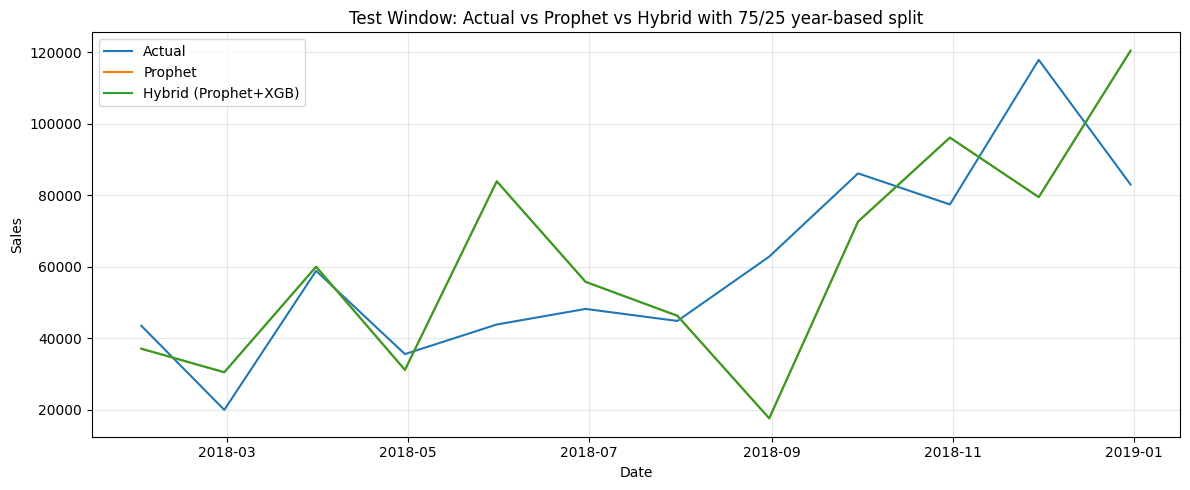

In [ ]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

# split = int(len(sales_daily_ppt) * 0.75)
# train_df = sales_daily_ppt.iloc[:split].copy()
# test_df  = sales_daily_ppt.iloc[split:].copy()
train_df = sales_daily_xgb[sales_daily_xgb["year"] <= 2017]
test_df  = sales_daily_xgb[sales_daily_xgb["year"] == 2018]

hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

hybrid_model.add_regressor("is_september",mode="multiplicative")
hybrid_model.add_regressor("is_november",mode="multiplicative")
hybrid_model.add_regressor("is_december",mode="multiplicative")
hybrid_model.add_regressor("is_january",mode="additive")

hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
                       test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left")
test_df  = test_df.merge(fcst_all, on="ds", how="left")

train_df["resid"] = train_df["y"] - train_df["yhat_p"]


## XGB RESD TRAINING ##
lags = (1, 2, 3, 6, 12)
def add_resid_features(df):
    df = df.copy()

    # residual lags
    for L in lags:
        df[f"resid_lag{L}"] = df["resid"].shift(L)

    # rolling stats on residuals
    # df["resid_roll_mean_3"] = df["resid"].shift(1).rolling(3).mean()
    df["resid_roll_std_3"]  = df["resid"].shift(1).rolling(3).std()

    # df["resid_roll_mean_6"] = df["resid"].shift(1).rolling(6).mean()
    # df["resid_roll_std_6"]  = df["resid"].shift(1).rolling(6).std()

    # df["resid_roll_mean_12"] = df["resid"].shift(1).rolling(12).mean()

    # calendar context (XGB only)
    df["year"] = df["ds"].dt.year
    df["month"] = df["ds"].dt.month
    df["quarter"] = df["ds"].dt.quarter

    # cyclic encoding (optional but good)
    # df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
    # df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

    return df

train_feat = add_resid_features(train_df).dropna().copy()

resid_features = [
    "resid_lag1","resid_lag2","resid_lag3","resid_lag6","resid_lag12",
    # "resid_roll_mean_3",
    "resid_roll_std_3",
    # "resid_roll_mean_6","resid_roll_std_6",
    # "resid_roll_mean_12",
    "year",
    "month","quarter",
    # "month_sin","month_cos",
    "yhat_p"  # Prophet baseline as anchor
]

X_train = train_feat[resid_features]
y_train = train_feat["resid"]

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [2, 3, 4],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "reg_alpha": [0, 0.01, 0.1, 1], #L1 regularisation
    "reg_lambda": [0.1, 1, 5, 10] #L2 regularisation
}


tscv = TimeSeriesSplit(n_splits=3)

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

rand_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,             
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

best_xgb = rand_search.best_estimator_

print("Best XGB params:", rand_search.best_params_)


test_df = test_df.copy()
test_df["resid_pred"] = np.nan

# history of residuals we are allowed to use = training residuals
resid_history = train_df["resid"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    # base features 
    feat = {
        "yhat_p": row["yhat_p"],
        "year": row["ds"].year,
        # calendar context (XGB only)
        "month": row["ds"].month,
        "quarter": row["ds"].quarter,
        "resid_roll_std_3": np.std(resid_history[-3:], ddof=1) if len(resid_history) >= 3 else 0.0
        # "month_sin": np.sin(2 * np.pi * row["ds"].month / 12),
        # "month_cos": np.cos(2 * np.pi * row["ds"].month / 12)
    }

    # residual lags
    
    for L in lags:
        feat[f"resid_lag{L}"] = resid_history[-L]

    # rolling features from residual history
    # feat["resid_roll_mean_3"] = np.mean(resid_history[-3:])
    # feat["resid_roll_std_3"]  = np.std(resid_history[-3:])

    # feat["resid_roll_mean_6"] = np.mean(resid_history[-6:])
    # feat["resid_roll_std_6"]  = np.std(resid_history[-6:])

    # feat["resid_roll_mean_12"] = np.mean(resid_history[-12:])

    # build dataframe in correct column order
    X_one = pd.DataFrame([feat])[resid_features]

    # predict residual
    r_hat = best_xgb.predict(X_one)[0]

    # store + roll forward
    test_df.loc[test_df.index[i], "resid_pred"] = r_hat
    resid_history.append(r_hat)

test_df["yhat_hybrid"] = test_df["yhat_p"] + test_df["resid_pred"]

y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Prophet + XGB (Residual Hybrid) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_hybrid"], label="Hybrid (Prophet+XGB)")
plt.title("Test Window: Actual vs Prophet vs Hybrid with 75/25 year-based split")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# check = test_df.copy()
# check["y_pred"] = y_pred  
# check["lag_1"] = sales_daily_xgb["y"].shift(1).loc[check.index].values

# check.loc[check["ds"].dt.year == 2018, ["ds","y","y_pred","lag_1"]]


## PLOTTING RESIDUAL

In [ ]:
print("Columns in train_df:", train_df.columns.tolist())
print("Columns in test_df:", test_df.columns.tolist())

Columns in train_df: ['ds', 'y', 'month', 'year', 'is_black_friday', 'is_september', 'is_november', 'is_december', 'is_january', 'yhat_p']
Columns in test_df: ['ds', 'y', 'month', 'year', 'is_black_friday', 'is_september', 'is_november', 'is_december', 'is_january', 'yhat_p', 'yhat_xgb', 'yhat_hybrid_wavg', 'resid_true']


In [ ]:
test_df["resid_true"] = test_df["y"] - test_df["yhat_p"] #errors from prophet

In [ ]:
if "resid_pred" not in test_df.columns:
    print("CRITICAL: 'resid_pred' was never created. Please re-run your 'for' loop cell.")
else:
    print("--- Statistical Summary of Residuals ---")
    print(f"True Residuals (Prophet Error):\n{test_df['resid_true'].describe()}\n")
    print(f"Predicted Residuals (XGBoost Correction):\n{test_df['resid_pred'].describe()}")

--- Statistical Summary of Residuals ---
True Residuals (Prophet Error):
count       12.000000
mean      -743.180299
std      25758.450557
min     -40098.100341
25%     -12579.531533
50%      -1297.770355
75%       8195.545897
max      45284.700985
Name: resid_true, dtype: float64

Predicted Residuals (XGBoost Correction):
count    12.000000
mean     -0.010319
std       1.230059
min      -1.140086
25%      -1.089301
50%      -0.492094
75%       1.506411
max       1.612530
Name: resid_pred, dtype: float64


In [ ]:
print("First 5 predicted residuals:")
print(test_df[["ds", "resid_pred"]].head())

First 5 predicted residuals:
          ds  resid_pred
0 2018-01-31   -0.128819
1 2018-02-28    1.474207
2 2018-03-31   -1.089119
3 2018-04-30   -1.140086
4 2018-05-31    1.603025


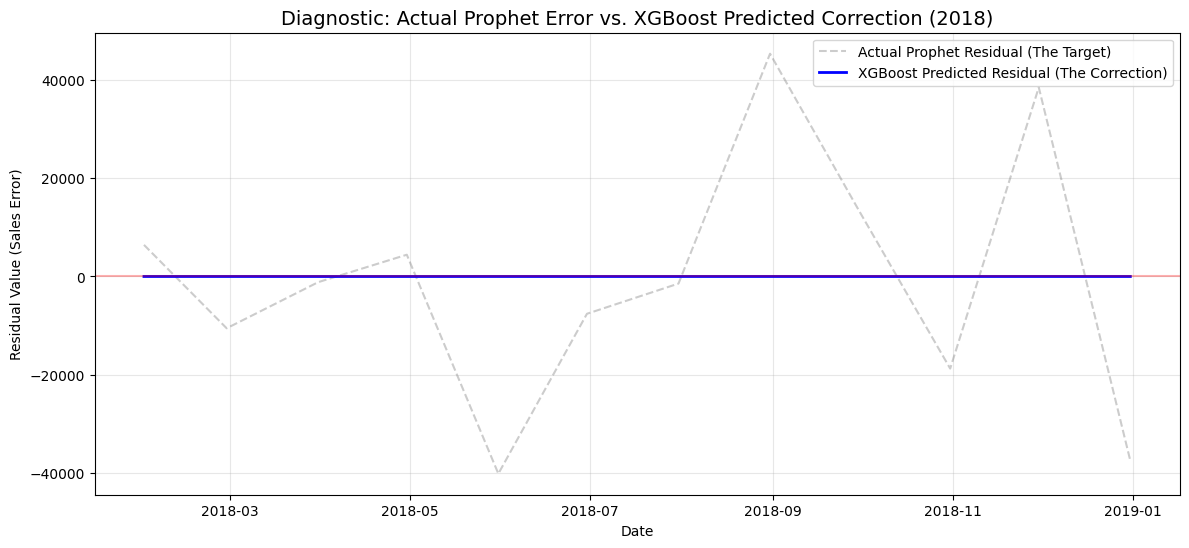

In [ ]:
plt.figure(figsize=(14, 6))

# Plot the Actual Prophet Error
plt.plot(test_df["ds"], test_df["resid_true"], 
         label="Actual Prophet Residual (The Target)", 
         color='gray', alpha=0.4, linestyle='--')

# Plot the XGBoost Predicted Correction
plt.plot(test_df["ds"], test_df["resid_pred"], 
         label="XGBoost Predicted Residual (The Correction)", 
         color='blue', linewidth=2)

# Add a zero line for reference
plt.axhline(0, color='red', linestyle='-', alpha=0.3)

plt.title("Diagnostic: Actual Prophet Error vs. XGBoost Predicted Correction (2018)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Residual Value (Sales Error)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

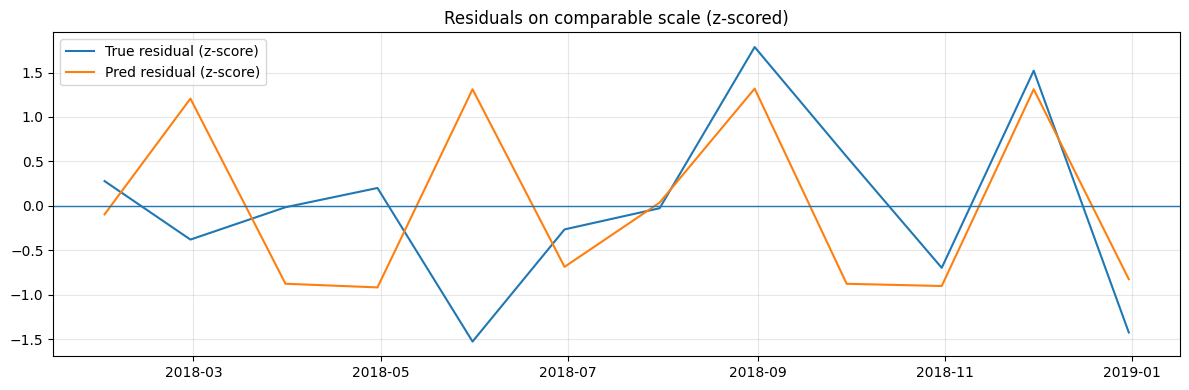

In [ ]:
## Directional learning pattern ##
rt = test_df["resid_true"]
rp = test_df["resid_pred"]

rt_z = (rt - rt.mean()) / rt.std()
rp_z = (rp - rp.mean()) / rp.std()

plt.figure(figsize=(12,4))
plt.plot(test_df["ds"], rt_z, label="True residual (z-score)")
plt.plot(test_df["ds"], rp_z, label="Pred residual (z-score)")
plt.axhline(0, linewidth=1)
plt.title("Residuals on comparable scale (z-scored)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
corr = np.corrcoef(test_df["resid_true"], test_df["resid_pred"])[0,1]
mae_resid = mean_absolute_error(test_df["resid_true"], test_df["resid_pred"])

print("Corr(true, pred residual):", corr)
print("Residual MAE:", mae_resid)
print("Mean true resid:", test_df["resid_true"].mean(), "Mean pred resid:", test_df["resid_pred"].mean())

Corr(true, pred residual): 0.2905488282603555
Residual MAE: 18755.85741149905
Mean true resid: -743.180299124226 Mean pred resid: -0.010318540347119173


## FEATURE IMPORTANCE PLOT

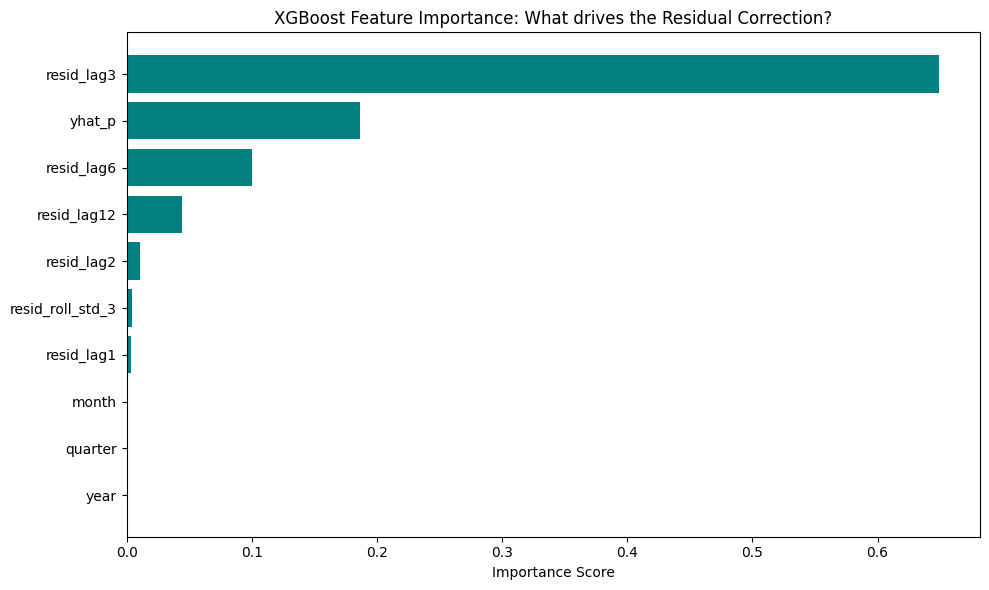

In [ ]:
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Sort them for a better plot
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='teal')
plt.title("XGBoost Feature Importance: What drives the Residual Correction?")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
results_summary = {
    "Model": ["Prophet (Baseline)", "Prophet + XGBoost (Hybrid)"],
    "MAE": [prophet_mae, mae],
    "RMSE": [prophet_rmse, rmse], # Ensure you calculated prophet_rmse earlier
    "MAPE (%)": [prophet_mape, mape],
    "MPE (%)": [prophet_mpe, mpe]
}

summary_df = pd.DataFrame(results_summary)
print(summary_df)

NameError: name 'prophet_mae' is not defined

## HYBRID WEIGHTED ##

In [ ]:
sales_daily_ppt = sales_daily_ppt.sort_values("ds").reset_index(drop=True)

sales_daily_ppt["month"] = sales_daily_ppt["ds"].dt.month
sales_daily_ppt["year"] = sales_daily_ppt["ds"].dt.year   
sales_daily_ppt["is_september"]     = (sales_daily_ppt["month"] == 9).astype(int)
sales_daily_ppt["is_november"]     = (sales_daily_ppt["month"] == 11).astype(int)
sales_daily_ppt["is_december"]     = (sales_daily_ppt["month"] == 12).astype(int)
sales_daily_ppt["is_january"]      = (sales_daily_ppt["month"] == 1).astype(int)

split = int(len(sales_daily_ppt) * 0.8)
train_df = sales_daily_ppt.iloc[:split].copy()
test_df  = sales_daily_ppt.iloc[split:].copy()


hybrid_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative",
    changepoint_prior_scale=0.09
)
hybrid_model.add_seasonality(
    name="quarterly",
    period=91.25, #365.25/4
    fourier_order=2 #conrtroling how complex the seasonl pattern is allowed to be. keeping it low since the original data doesnt have high seasonality
)

hybrid_model.add_regressor("is_september",mode="multiplicative")
hybrid_model.add_regressor("is_november",mode="multiplicative")
hybrid_model.add_regressor("is_december",mode="multiplicative")
hybrid_model.add_regressor("is_january",mode="additive")

hybrid_model.fit(train_df[["ds","y", "is_september","is_november","is_december", "is_january"]])

all_dates = pd.concat([train_df[["ds", "is_september","is_november","is_december", "is_january"]], 
                       test_df[["ds", "is_september","is_november","is_december", "is_january"]]], axis=0)
fcst_all = hybrid_model.predict(all_dates)


fcst_all = fcst_all[["ds","yhat"]].rename(columns={"yhat":"yhat_p"})
train_df = train_df.merge(fcst_all, on="ds", how="left") #mergeing actual and forecasted to feed to XGB
test_df  = test_df.merge(fcst_all, on="ds", how="left")


20:10:50 - cmdstanpy - INFO - Chain [1] start processing
20:10:50 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# --- features for direct y forecasting ---
y_lags = (1, 2, 3, 6, 12)

def add_y_features(df):
    df = df.copy()

    # y lags (ONLY allowed within training; for test we will roll forward)
    for L in y_lags:
        df[f"y_lag{L}"] = df["y"].shift(L)

    # # rolling stats on y (optional)
    df["y_roll_std_3"] = df["y"].shift(1).rolling(3).std()

    # calendar context
    df["year"] = df["ds"].dt.year
    df["month"] = df["ds"].dt.month
    df["quarter"] = df["ds"].dt.quarter

    return df

train_feat_y = add_y_features(train_df).dropna().copy()

xgb_features = (
    [f"y_lag{L}" for L in y_lags]
    + ["year", "month", "quarter", "yhat_p"]  # include prophet anchor
)

X_train_y = train_feat_y[xgb_features]
y_train_y = train_feat_y["y"]

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [2, 3, 4],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "reg_alpha": [0, 0.01, 0.1, 1],
    "reg_lambda": [0.1, 1, 5, 10]
}

tscv = TimeSeriesSplit(n_splits=3)

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

rand_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train_y, y_train_y)
best_xgb_y = rand_search.best_estimator_

print("Best XGB params:", rand_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGB params: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.03, 'colsample_bytree': 0.9}


In [ ]:
test_df = test_df.copy()
test_df["yhat_xgb"] = np.nan

# history of y we are allowed to use: training actuals
y_history = train_df["y"].tolist()

for i in range(len(test_df)):
    row = test_df.iloc[i]

    feat = {
        "yhat_p": row["yhat_p"],
        "year": row["ds"].year,
        "month": row["ds"].month,
        "quarter": row["ds"].quarter,
        "y_roll_std_3": np.std(y_history[-3:], ddof=1) if len(y_history) >= 3 else 0.0
    }

    for L in y_lags:
        feat[f"y_lag{L}"] = y_history[-L]

    X_one = pd.DataFrame([feat])[xgb_features]
    y_hat = best_xgb_y.predict(X_one)[0]

    test_df.loc[test_df.index[i], "yhat_xgb"] = y_hat
    y_history.append(y_hat)  # roll forward using prediction

In [ ]:
w = 0.6  # Prophet weight
test_df["yhat_hybrid_wavg"] = w * test_df["yhat_p"] + (1 - w) * test_df["yhat_xgb"]

=== Weighted Avg Hybrid (Prophet + XGB) ===
MAE : 12,319.08
RMSE: 14,980.96
MAPE: 19.81%
MPE : 1.98%


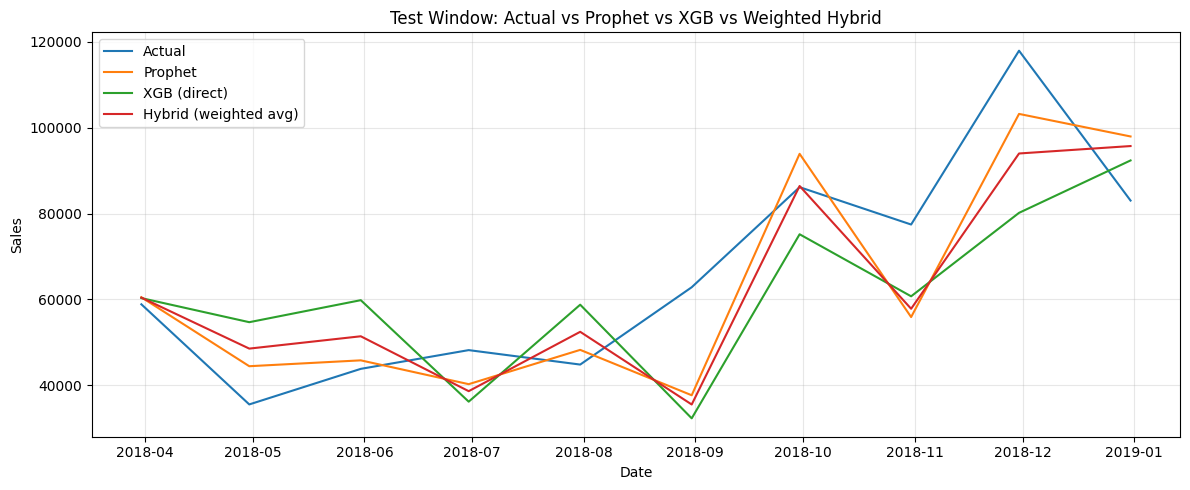

In [ ]:
y_true = test_df["y"].values
y_pred = test_df["yhat_hybrid_wavg"].values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mpe  = np.mean((y_true - y_pred) / y_true) * 100

print("=== Weighted Avg Hybrid (Prophet + XGB) ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MPE : {mpe:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test_df["ds"], test_df["y"], label="Actual")
plt.plot(test_df["ds"], test_df["yhat_p"], label="Prophet")
plt.plot(test_df["ds"], test_df["yhat_xgb"], label="XGB (direct)")
plt.plot(test_df["ds"], test_df["yhat_hybrid_wavg"], label="Hybrid (weighted avg)")
plt.title("Test Window: Actual vs Prophet vs XGB vs Weighted Hybrid")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()